<a href="https://colab.research.google.com/github/RonnyGuevara/Computer_Graphics/blob/main/TP6/CG6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Nodos
#HTML

In [ ]:
<doctype html>	
<html>
<head>
<title>PSG 2022</title>

<!-- estilo-->
<link href="style.css" rel="stylesheet">

<!-- <script type="text/javascript" id="includedscript" src="boxdrawer.js"></script> -->
<script src="https://greggman.github.io/webgl-lint/webgl-lint.js" crossorigin></script>


<script type="text/javascript" id="includedscript" src="transform.js"></script>
<script type="text/javascript" id="includedscript" src="node.js"></script>
<script type="text/javascript" id="includedscript" src="camera-perspective.js"></script>
<script type="text/javascript" id="includedscript" src="pyramid.js"></script>
<!-- <script type="text/javascript" id="includedscript" src="project4.js"></script> -->
<!-- <script type="text/javascript" src="Vector2D.js"></script> -->
<script src="gl-matrix-min.js"></script>
<script src="shaders-utils.js"></script>
<script type="text/javascript"  src="main.js"></script>
<!-- <script type="text/javascript"  src="esm/index.js"></script> -->


<!-- <script type="text/javascript" id="includedscript" src="ejercicio.js"></script> -->
</head>


<body onresize="WindowResize()">
	<!-- canvas (WebGL)-->
	<!-- <div id="canvas-div"> -->
		<canvas id="canvas"></canvas>
<!-- 	</div> -->

</body>
</html>

#JAVA


In [ ]:
class PerspectiveCamera {

    constructor() {
        
        this.fov = to_rad(45)   
        this.yaw = 0
        this.pitch = 0
        this.view_pos = vec3.fromValues(0, 0, 0)
        this.target = vec3.fromValues(0, 0, 0)
    
        this.update_matrices();
    }


    look_at(from, to) {
        let look_vector = vec3_normalize(vec3.create(), vec3.sub(vec3.create(), to, from))

        this.yaw = Math.atan2(look_vector[2], look_vector[0]) // -90
        this.pitch = Math.max( to_rad(-89.9), Math.min( Math.asin(look_vector[1]), to_rad(89.9)) );
        this.view_pos = from;

        //console.log( to_deg(this.yaw), to_deg(this.pitch), this.view_pos)

        this.update_matrices();
    } 

    look_direction() {
        
        let theta_rad = this.yaw;
        let phi_rad = this.pitch;
        let cos_phi = Math.cos(phi_rad);

        let x = cos_phi * Math.cos(theta_rad);
        let y = Math.sin(phi_rad);
        let z = cos_phi * Math.sin(theta_rad);

        return vec3.normalize(vec3.create(), vec3.fromValues(x, y, z));
    }

    set_pitch(pitch) {
        this.pitch = pitch
        this.update_matrices()
    }
    set_delta_pitch(delta) { this.set_pitch(this.pitch + delta); }

    set_yaw(yaw) {
        this.yaw = yaw
        this.update_matrices()
    }
    set_delta_yaw(delta) { this.set_yaw(this.yaw + delta); }

    translateU(units)
    {
        let dir = vec3.normalize(vec3.create(), vec3.cross(vec3.create(), this.look_direction(), vec3.fromValues(0, 1, 0)));

        vec3.add(this.view_pos, this.view_pos, vec3.scale(vec3.create(), dir, units));
        this.update_matrices();
    }

    translateV(units)
    {
        let U = vec3.normalize(vec3.create(), vec3.cross(vec3.create(), this.look_direction(), vec3.fromValues(0, 1, 0)));
        let dir = vec3.normalize(vec3.create(), vec3.cross(vec3.create(), U, this.look_direction()));

        this.view_pos = vec3.add(vec3.create(), vec3.scale(vec3.create(), dir, units), this.view_pos);
        this.update_matrices();
    }

    translateW(units)
    {
        console.log(vec3.scale(vec3.create(), this.look_direction(), units))
        this.view_pos = vec3.add(vec3.create(), vec3.scale(vec3.create(), this.look_direction(), units), this.view_pos);
        this.update_matrices();
    }

    set_fov( new_fov ) {
        this.fov = Math.max(Math.min(new_fov, to_rad(90)), to_rad(5))
        this.update_matrices()
    }
    
    get_fov() {return this.fov;}

    // get_pos() {return this.pos;}

    // move(delta) {
    //     this.pos[0] += delta[0]
    //     this.pos[1] += delta[1]

    //     this.target[0] += delta[0]
    //     this.target[1] += delta[1]
    //     this.update_matrices();
    // }
    // set_pos(pos) {
    //     this.view_pos = pos;
    //     this.update_matrices();
    // }

    // set_target(target) {
    //     this.target = target;
    //     this.update_matrices();
    // }

    get_proj_mat() {
        return this.proj_mat;
    }

    get_view_mat() {
        return this.view_mat;
    }

    update_matrices() {
        this.proj_mat = mat4.perspective(mat4.create(), this.fov, 1.0, 0.1, 15)
        this.view_mat = mat4.lookAt(mat4.create(), this.view_pos, vec3.add(vec3.create(), this.view_pos, this.look_direction()), vec3.fromValues(0, 1, 0))
        // this.view_mat = mat4.lookAt(mat4.create(), this.view_pos, this.target, vec3.fromValues(0, 1, 0))
    }

}

In [ ]:
/*!
@fileoverview gl-matrix - High performance matrix and vector operations
@author Brandon Jones
@author Colin MacKenzie IV
@version 3.4.0

Copyright (c) 2015-2021, Brandon Jones, Colin MacKenzie IV.

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in
all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
THE SOFTWARE.

*/
!function(t,n){"object"==typeof exports&&"undefined"!=typeof module?n(exports):"function"==typeof define&&define.amd?define(["exports"],n):n((t="undefined"!=typeof globalThis?globalThis:t||self).glMatrix={})}(this,(function(t){"use strict";var n=1e-6,a="undefined"!=typeof Float32Array?Float32Array:Array,r=Math.random,u="zyx";var e=Math.PI/180;Math.hypot||(Math.hypot=function(){for(var t=0,n=arguments.length;n--;)t+=arguments[n]*arguments[n];return Math.sqrt(t)});var o=Object.freeze({__proto__:null,EPSILON:n,get ARRAY_TYPE(){return a},RANDOM:r,ANGLE_ORDER:u,setMatrixArrayType:function(t){a=t},toRadian:function(t){return t*e},equals:function(t,a){return Math.abs(t-a)<=n*Math.max(1,Math.abs(t),Math.abs(a))}});function i(t,n,a){var r=n[0],u=n[1],e=n[2],o=n[3],i=a[0],h=a[1],c=a[2],s=a[3];return t[0]=r*i+e*h,t[1]=u*i+o*h,t[2]=r*c+e*s,t[3]=u*c+o*s,t}function h(t,n,a){return t[0]=n[0]-a[0],t[1]=n[1]-a[1],t[2]=n[2]-a[2],t[3]=n[3]-a[3],t}var c=i,s=h,M=Object.freeze({__proto__:null,create:function(){var t=new a(4);return a!=Float32Array&&(t[1]=0,t[2]=0),t[0]=1,t[3]=1,t},clone:function(t){var n=new a(4);return n[0]=t[0],n[1]=t[1],n[2]=t[2],n[3]=t[3],n},copy:function(t,n){return t[0]=n[0],t[1]=n[1],t[2]=n[2],t[3]=n[3],t},identity:function(t){return t[0]=1,t[1]=0,t[2]=0,t[3]=1,t},fromValues:function(t,n,r,u){var e=new a(4);return e[0]=t,e[1]=n,e[2]=r,e[3]=u,e},set:function(t,n,a,r,u){return t[0]=n,t[1]=a,t[2]=r,t[3]=u,t},transpose:function(t,n){if(t===n){var a=n[1];t[1]=n[2],t[2]=a}else t[0]=n[0],t[1]=n[2],t[2]=n[1],t[3]=n[3];return t},invert:function(t,n){var a=n[0],r=n[1],u=n[2],e=n[3],o=a*e-u*r;return o?(o=1/o,t[0]=e*o,t[1]=-r*o,t[2]=-u*o,t[3]=a*o,t):null},adjoint:function(t,n){var a=n[0];return t[0]=n[3],t[1]=-n[1],t[2]=-n[2],t[3]=a,t},determinant:function(t){return t[0]*t[3]-t[2]*t[1]},multiply:i,rotate:function(t,n,a){var r=n[0],u=n[1],e=n[2],o=n[3],i=Math.sin(a),h=Math.cos(a);return t[0]=r*h+e*i,t[1]=u*h+o*i,t[2]=r*-i+e*h,t[3]=u*-i+o*h,t},scale:function(t,n,a){var r=n[0],u=n[1],e=n[2],o=n[3],i=a[0],h=a[1];return t[0]=r*i,t[1]=u*i,t[2]=e*h,t[3]=o*h,t},fromRotation:function(t,n){var a=Math.sin(n),r=Math.cos(n);return t[0]=r,t[1]=a,t[2]=-a,t[3]=r,t},fromScaling:function(t,n){return t[0]=n[0],t[1]=0,t[2]=0,t[3]=n[1],t},str:function(t){return"mat2("+t[0]+", "+t[1]+", "+t[2]+", "+t[3]+")"},frob:function(t){return Math.hypot(t[0],t[1],t[2],t[3])},LDU:function(t,n,a,r){return t[2]=r[2]/r[0],a[0]=r[0],a[1]=r[1],a[3]=r[3]-t[2]*a[1],[t,n,a]},add:function(t,n,a){return t[0]=n[0]+a[0],t[1]=n[1]+a[1],t[2]=n[2]+a[2],t[3]=n[3]+a[3],t},subtract:h,exactEquals:function(t,n){return t[0]===n[0]&&t[1]===n[1]&&t[2]===n[2]&&t[3]===n[3]},equals:function(t,a){var r=t[0],u=t[1],e=t[2],o=t[3],i=a[0],h=a[1],c=a[2],s=a[3];return Math.abs(r-i)<=n*Math.max(1,Math.abs(r),Math.abs(i))&&Math.abs(u-h)<=n*Math.max(1,Math.abs(u),Math.abs(h))&&Math.abs(e-c)<=n*Math.max(1,Math.abs(e),Math.abs(c))&&Math.abs(o-s)<=n*Math.max(1,Math.abs(o),Math.abs(s))},multiplyScalar:function(t,n,a){return t[0]=n[0]*a,t[1]=n[1]*a,t[2]=n[2]*a,t[3]=n[3]*a,t},multiplyScalarAndAdd:function(t,n,a,r){return t[0]=n[0]+a[0]*r,t[1]=n[1]+a[1]*r,t[2]=n[2]+a[2]*r,t[3]=n[3]+a[3]*r,t},mul:c,sub:s});function f(t,n,a){var r=n[0],u=n[1],e=n[2],o=n[3],i=n[4],h=n[5],c=a[0],s=a[1],M=a[2],f=a[3],l=a[4],v=a[5];return t[0]=r*c+e*s,t[1]=u*c+o*s,t[2]=r*M+e*f,t[3]=u*M+o*f,t[4]=r*l+e*v+i,t[5]=u*l+o*v+h,t}function l(t,n,a){return t[0]=n[0]-a[0],t[1]=n[1]-a[1],t[2]=n[2]-a[2],t[3]=n[3]-a[3],t[4]=n[4]-a[4],t[5]=n[5]-a[5],t}var v=f,b=l,m=Object.freeze({__proto__:null,create:function(){var t=new a(6);return a!=Float32Array&&(t[1]=0,t[2]=0,t[4]=0,t[5]=0),t[0]=1,t[3]=1,t},clone:function(t){var n=new a(6);return n[0]=t[0],n[1]=t[1],n[2]=t[2],n[3]=t[3],n[4]=t[4],n[5]=t[5],n},copy:function(t,n){return t[0]=n[0],t[1]=n[1],t[2]=n[2],t[3]=n[3],t[4]=n[4],t[5]=n[5],t},identity:function(t){return t[0]=1,t[1]=0,t[2]=0,t[3]=1,t[4]=0,t[5]=0,t},fromValues:function(t,n,r,u,e,o){var i=new a(6);return i[0]=t,i[1]=n,i[2]=r,i[3]=u,i[4]=e,i[5]=o,i},set:function(t,n,a,r,u,e,o){return t[0]=n,t[1]=a,t[2]=r,t[3]=u,t[4]=e,t[5]=o,t},invert:function(t,n){var a=n[0],r=n[1],u=n[2],e=n[3],o=n[4],i=n[5],h=a*e-r*u;return h?(h=1/h,t[0]=e*h,t[1]=-r*h,t[2]=-u*h,t[3]=a*h,t[4]=(u*i-e*o)*h,t[5]=(r*o-a*i)*h,t):null},determinant:function(t){return t[0]*t[3]-t[1]*t[2]},multiply:f,rotate:function(t,n,a){var r=n[0],u=n[1],e=n[2],o=n[3],i=n[4],h=n[5],c=Math.sin(a),s=Math.cos(a);return t[0]=r*s+e*c,t[1]=u*s+o*c,t[2]=r*-c+e*s,t[3]=u*-c+o*s,t[4]=i,t[5]=h,t},scale:function(t,n,a){var r=n[0],u=n[1],e=n[2],o=n[3],i=n[4],h=n[5],c=a[0],s=a[1];return t[0]=r*c,t[1]=u*c,t[2]=e*s,t[3]=o*s,t[4]=i,t[5]=h,t},translate:function(t,n,a){var r=n[0],u=n[1],e=n[2],o=n[3],i=n[4],h=n[5],c=a[0],s=a[1];return t[0]=r,t[1]=u,t[2]=e,t[3]=o,t[4]=r*c+e*s+i,t[5]=u*c+o*s+h,t},fromRotation:function(t,n){var a=Math.sin(n),r=Math.cos(n);return t[0]=r,t[1]=a,t[2]=-a,t[3]=r,t[4]=0,t[5]=0,t},fromScaling:function(t,n){return t[0]=n[0],t[1]=0,t[2]=0,t[3]=n[1],t[4]=0,t[5]=0,t},fromTranslation:function(t,n){return t[0]=1,t[1]=0,t[2]=0,t[3]=1,t[4]=n[0],t[5]=n[1],t},str:function(t){return"mat2d("+t[0]+", "+t[1]+", "+t[2]+", "+t[3]+", "+t[4]+", "+t[5]+")"},frob:function(t){return Math.hypot(t[0],t[1],t[2],t[3],t[4],t[5],1)},add:function(t,n,a){return t[0]=n[0]+a[0],t[1]=n[1]+a[1],t[2]=n[2]+a[2],t[3]=n[3]+a[3],t[4]=n[4]+a[4],t[5]=n[5]+a[5],t},subtract:l,multiplyScalar:function(t,n,a){return t[0]=n[0]*a,t[1]=n[1]*a,t[2]=n[2]*a,t[3]=n[3]*a,t[4]=n[4]*a,t[5]=n[5]*a,t},multiplyScalarAndAdd:function(t,n,a,r){return t[0]=n[0]+a[0]*r,t[1]=n[1]+a[1]*r,t[2]=n[2]+a[2]*r,t[3]=n[3]+a[3]*r,t[4]=n[4]+a[4]*r,t[5]=n[5]+a[5]*r,t},exactEquals:function(t,n){return t[0]===n[0]&&t[1]===n[1]&&t[2]===n[2]&&t[3]===n[3]&&t[4]===n[4]&&t[5]===n[5]},equals:function(t,a){var r=t[0],u=t[1],e=t[2],o=t[3],i=t[4],h=t[5],c=a[0],s=a[1],M=a[2],f=a[3],l=a[4],v=a[5];return Math.abs(r-c)<=n*Math.max(1,Math.abs(r),Math.abs(c))&&Math.abs(u-s)<=n*Math.max(1,Math.abs(u),Math.abs(s))&&Math.abs(e-M)<=n*Math.max(1,Math.abs(e),Math.abs(M))&&Math.abs(o-f)<=n*Math.max(1,Math.abs(o),Math.abs(f))&&Math.abs(i-l)<=n*Math.max(1,Math.abs(i),Math.abs(l))&&Math.abs(h-v)<=n*Math.max(1,Math.abs(h),Math.abs(v))},mul:v,sub:b});function d(){var t=new a(9);return a!=Float32Array&&(t[1]=0,t[2]=0,t[3]=0,t[5]=0,t[6]=0,t[7]=0),t[0]=1,t[4]=1,t[8]=1,t}function p(t,n,a){var r=n[0],u=n[1],e=n[2],o=n[3],i=n[4],h=n[5],c=n[6],s=n[7],M=n[8],f=a[0],l=a[1],v=a[2],b=a[3],m=a[4],d=a[5],p=a[6],x=a[7],y=a[8];return t[0]=f*r+l*o+v*c,t[1]=f*u+l*i+v*s,t[2]=f*e+l*h+v*M,t[3]=b*r+m*o+d*c,t[4]=b*u+m*i+d*s,t[5]=b*e+m*h+d*M,t[6]=p*r+x*o+y*c,t[7]=p*u+x*i+y*s,t[8]=p*e+x*h+y*M,t}function x(t,n,a){return t[0]=n[0]-a[0],t[1]=n[1]-a[1],t[2]=n[2]-a[2],t[3]=n[3]-a[3],t[4]=n[4]-a[4],t[5]=n[5]-a[5],t[6]=n[6]-a[6],t[7]=n[7]-a[7],t[8]=n[8]-a[8],t}var y=p,q=x,g=Object.freeze({__proto__:null,create:d,fromMat4:function(t,n){return t[0]=n[0],t[1]=n[1],t[2]=n[2],t[3]=n[4],t[4]=n[5],t[5]=n[6],t[6]=n[8],t[7]=n[9],t[8]=n[10],t},clone:function(t){var n=new a(9);return n[0]=t[0],n[1]=t[1],n[2]=t[2],n[3]=t[3],n[4]=t[4],n[5]=t[5],n[6]=t[6],n[7]=t[7],n[8]=t[8],n},copy:function(t,n){return t[0]=n[0],t[1]=n[1],t[2]=n[2],t[3]=n[3],t[4]=n[4],t[5]=n[5],t[6]=n[6],t[7]=n[7],t[8]=n[8],t},fromValues:function(t,n,r,u,e,o,i,h,c){var s=new a(9);return s[0]=t,s[1]=n,s[2]=r,s[3]=u,s[4]=e,s[5]=o,s[6]=i,s[7]=h,s[8]=c,s},set:function(t,n,a,r,u,e,o,i,h,c){return t[0]=n,t[1]=a,t[2]=r,t[3]=u,t[4]=e,t[5]=o,t[6]=i,t[7]=h,t[8]=c,t},identity:function(t){return t[0]=1,t[1]=0,t[2]=0,t[3]=0,t[4]=1,t[5]=0,t[6]=0,t[7]=0,t[8]=1,t},transpose:function(t,n){if(t===n){var a=n[1],r=n[2],u=n[5];t[1]=n[3],t[2]=n[6],t[3]=a,t[5]=n[7],t[6]=r,t[7]=u}else t[0]=n[0],t[1]=n[3],t[2]=n[6],t[3]=n[1],t[4]=n[4],t[5]=n[7],t[6]=n[2],t[7]=n[5],t[8]=n[8];return t},invert:function(t,n){var a=n[0],r=n[1],u=n[2],e=n[3],o=n[4],i=n[5],h=n[6],c=n[7],s=n[8],M=s*o-i*c,f=-s*e+i*h,l=c*e-o*h,v=a*M+r*f+u*l;return v?(v=1/v,t[0]=M*v,t[1]=(-s*r+u*c)*v,t[2]=(i*r-u*o)*v,t[3]=f*v,t[4]=(s*a-u*h)*v,t[5]=(-i*a+u*e)*v,t[6]=l*v,t[7]=(-c*a+r*h)*v,t[8]=(o*a-r*e)*v,t):null},adjoint:function(t,n){var a=n[0],r=n[1],u=n[2],e=n[3],o=n[4],i=n[5],h=n[6],c=n[7],s=n[8];return t[0]=o*s-i*c,t[1]=u*c-r*s,t[2]=r*i-u*o,t[3]=i*h-e*s,t[4]=a*s-u*h,t[5]=u*e-a*i,t[6]=e*c-o*h,t[7]=r*h-a*c,t[8]=a*o-r*e,t},determinant:function(t){var n=t[0],a=t[1],r=t[2],u=t[3],e=t[4],o=t[5],i=t[6],h=t[7],c=t[8];return n*(c*e-o*h)+a*(-c*u+o*i)+r*(h*u-e*i)},multiply:p,translate:function(t,n,a){var r=n[0],u=n[1],e=n[2],o=n[3],i=n[4],h=n[5],c=n[6],s=n[7],M=n[8],f=a[0],l=a[1];return t[0]=r,t[1]=u,t[2]=e,t[3]=o,t[4]=i,t[5]=h,t[6]=f*r+l*o+c,t[7]=f*u+l*i+s,t[8]=f*e+l*h+M,t},rotate:function(t,n,a){var r=n[0],u=n[1],e=n[2],o=n[3],i=n[4],h=n[5],c=n[6],s=n[7],M=n[8],f=Math.sin(a),l=Math.cos(a);return t[0]=l*r+f*o,t[1]=l*u+f*i,t[2]=l*e+f*h,t[3]=l*o-f*r,t[4]=l*i-f*u,t[5]=l*h-f*e,t[6]=c,t[7]=s,t[8]=M,t},scale:function(t,n,a){var r=a[0],u=a[1];return t[0]=r*n[0],t[1]=r*n[1],t[2]=r*n[2],t[3]=u*n[3],t[4]=u*n[4],t[5]=u*n[5],t[6]=n[6],t[7]=n[7],t[8]=n[8],t},fromTranslation:function(t,n){return t[0]=1,t[1]=0,t[2]=0,t[3]=0,t[4]=1,t[5]=0,t[6]=n[0],t[7]=n[1],t[8]=1,t},fromRotation:function(t,n){var a=Math.sin(n),r=Math.cos(n);return t[0]=r,t[1]=a,t[2]=0,t[3]=-a,t[4]=r,t[5]=0,t[6]=0,t[7]=0,t[8]=1,t},fromScaling:function(t,n){return t[0]=n[0],t[1]=0,t[2]=0,t[3]=0,t[4]=n[1],t[5]=0,t[6]=0,t[7]=0,t[8]=1,t},fromMat2d:function(t,n){return t[0]=n[0],t[1]=n[1],t[2]=0,t[3]=n[2],t[4]=n[3],t[5]=0,t[6]=n[4],t[7]=n[5],t[8]=1,t},fromQuat:function(t,n){var a=n[0],r=n[1],u=n[2],e=n[3],o=a+a,i=r+r,h=u+u,c=a*o,s=r*o,M=r*i,f=u*o,l=u*i,v=u*h,b=e*o,m=e*i,d=e*h;return t[0]=1-M-v,t[3]=s-d,t[6]=f+m,t[1]=s+d,t[4]=1-c-v,t[7]=l-b,t[2]=f-m,t[5]=l+b,t[8]=1-c-M,t},normalFromMat4:function(t,n){var a=n[0],r=n[1],u=n[2],e=n[3],o=n[4],i=n[5],h=n[6],c=n[7],s=n[8],M=n[9],f=n[10],l=n[11],v=n[12],b=n[13],m=n[14],d=n[15],p=a*i-r*o,x=a*h-u*o,y=a*c-e*o,q=r*h-u*i,g=r*c-e*i,_=u*c-e*h,A=s*b-M*v,w=s*m-f*v,z=s*d-l*v,R=M*m-f*b,O=M*d-l*b,j=f*d-l*m,E=p*j-x*O+y*R+q*z-g*w+_*A;return E?(E=1/E,t[0]=(i*j-h*O+c*R)*E,t[1]=(h*z-o*j-c*w)*E,t[2]=(o*O-i*z+c*A)*E,t[3]=(u*O-r*j-e*R)*E,t[4]=(a*j-u*z+e*w)*E,t[5]=(r*z-a*O-e*A)*E,t[6]=(b*_-m*g+d*q)*E,t[7]=(m*y-v*_-d*x)*E,t[8]=(v*g-b*y+d*p)*E,t):null},projection:function(t,n,a){return t[0]=2/n,t[1]=0,t[2]=0,t[3]=0,t[4]=-2/a,t[5]=0,t[6]=-1,t[7]=1,t[8]=1,t},str:function(t){return"mat3("+t[0]+", "+t[1]+", "+t[2]+", "+t[3]+", "+t[4]+", "+t[5]+", "+t[6]+", "+t[7]+", "+t[8]+")"},frob:function(t){return Math.hypot(t[0],t[1],t[2],t[3],t[4],t[5],t[6],t[7],t[8])},add:function(t,n,a){return t[0]=n[0]+a[0],t[1]=n[1]+a[1],t[2]=n[2]+a[2],t[3]=n[3]+a[3],t[4]=n[4]+a[4],t[5]=n[5]+a[5],t[6]=n[6]+a[6],t[7]=n[7]+a[7],t[8]=n[8]+a[8],t},subtract:x,multiplyScalar:function(t,n,a){return t[0]=n[0]*a,t[1]=n[1]*a,t[2]=n[2]*a,t[3]=n[3]*a,t[4]=n[4]*a,t[5]=n[5]*a,t[6]=n[6]*a,t[7]=n[7]*a,t[8]=n[8]*a,t},multiplyScalarAndAdd:function(t,n,a,r){return t[0]=n[0]+a[0]*r,t[1]=n[1]+a[1]*r,t[2]=n[2]+a[2]*r,t[3]=n[3]+a[3]*r,t[4]=n[4]+a[4]*r,t[5]=n[5]+a[5]*r,t[6]=n[6]+a[6]*r,t[7]=n[7]+a[7]*r,t[8]=n[8]+a[8]*r,t},exactEquals:function(t,n){return t[0]===n[0]&&t[1]===n[1]&&t[2]===n[2]&&t[3]===n[3]&&t[4]===n[4]&&t[5]===n[5]&&t[6]===n[6]&&t[7]===n[7]&&t[8]===n[8]},equals:function(t,a){var r=t[0],u=t[1],e=t[2],o=t[3],i=t[4],h=t[5],c=t[6],s=t[7],M=t[8],f=a[0],l=a[1],v=a[2],b=a[3],m=a[4],d=a[5],p=a[6],x=a[7],y=a[8];return Math.abs(r-f)<=n*Math.max(1,Math.abs(r),Math.abs(f))&&Math.abs(u-l)<=n*Math.max(1,Math.abs(u),Math.abs(l))&&Math.abs(e-v)<=n*Math.max(1,Math.abs(e),Math.abs(v))&&Math.abs(o-b)<=n*Math.max(1,Math.abs(o),Math.abs(b))&&Math.abs(i-m)<=n*Math.max(1,Math.abs(i),Math.abs(m))&&Math.abs(h-d)<=n*Math.max(1,Math.abs(h),Math.abs(d))&&Math.abs(c-p)<=n*Math.max(1,Math.abs(c),Math.abs(p))&&Math.abs(s-x)<=n*Math.max(1,Math.abs(s),Math.abs(x))&&Math.abs(M-y)<=n*Math.max(1,Math.abs(M),Math.abs(y))},mul:y,sub:q});function _(t){return t[0]=1,t[1]=0,t[2]=0,t[3]=0,t[4]=0,t[5]=1,t[6]=0,t[7]=0,t[8]=0,t[9]=0,t[10]=1,t[11]=0,t[12]=0,t[13]=0,t[14]=0,t[15]=1,t}function A(t,n,a){var r=n[0],u=n[1],e=n[2],o=n[3],i=n[4],h=n[5],c=n[6],s=n[7],M=n[8],f=n[9],l=n[10],v=n[11],b=n[12],m=n[13],d=n[14],p=n[15],x=a[0],y=a[1],q=a[2],g=a[3];return t[0]=x*r+y*i+q*M+g*b,t[1]=x*u+y*h+q*f+g*m,t[2]=x*e+y*c+q*l+g*d,t[3]=x*o+y*s+q*v+g*p,x=a[4],y=a[5],q=a[6],g=a[7],t[4]=x*r+y*i+q*M+g*b,t[5]=x*u+y*h+q*f+g*m,t[6]=x*e+y*c+q*l+g*d,t[7]=x*o+y*s+q*v+g*p,x=a[8],y=a[9],q=a[10],g=a[11],t[8]=x*r+y*i+q*M+g*b,t[9]=x*u+y*h+q*f+g*m,t[10]=x*e+y*c+q*l+g*d,t[11]=x*o+y*s+q*v+g*p,x=a[12],y=a[13],q=a[14],g=a[15],t[12]=x*r+y*i+q*M+g*b,t[13]=x*u+y*h+q*f+g*m,t[14]=x*e+y*c+q*l+g*d,t[15]=x*o+y*s+q*v+g*p,t}function w(t,n,a){var r=n[0],u=n[1],e=n[2],o=n[3],i=r+r,h=u+u,c=e+e,s=r*i,M=r*h,f=r*c,l=u*h,v=u*c,b=e*c,m=o*i,d=o*h,p=o*c;return t[0]=1-(l+b),t[1]=M+p,t[2]=f-d,t[3]=0,t[4]=M-p,t[5]=1-(s+b),t[6]=v+m,t[7]=0,t[8]=f+d,t[9]=v-m,t[10]=1-(s+l),t[11]=0,t[12]=a[0],t[13]=a[1],t[14]=a[2],t[15]=1,t}function z(t,n){return t[0]=n[12],t[1]=n[13],t[2]=n[14],t}function R(t,n){var a=n[0],r=n[1],u=n[2],e=n[4],o=n[5],i=n[6],h=n[8],c=n[9],s=n[10];return t[0]=Math.hypot(a,r,u),t[1]=Math.hypot(e,o,i),t[2]=Math.hypot(h,c,s),t}function O(t,n){var r=new a(3);R(r,n);var u=1/r[0],e=1/r[1],o=1/r[2],i=n[0]*u,h=n[1]*e,c=n[2]*o,s=n[4]*u,M=n[5]*e,f=n[6]*o,l=n[8]*u,v=n[9]*e,b=n[10]*o,m=i+M+b,d=0;return m>0?(d=2*Math.sqrt(m+1),t[3]=.25*d,t[0]=(f-v)/d,t[1]=(l-c)/d,t[2]=(h-s)/d):i>M&&i>b?(d=2*Math.sqrt(1+i-M-b),t[3]=(f-v)/d,t[0]=.25*d,t[1]=(h+s)/d,t[2]=(l+c)/d):M>b?(d=2*Math.sqrt(1+M-i-b),t[3]=(l-c)/d,t[0]=(h+s)/d,t[1]=.25*d,t[2]=(f+v)/d):(d=2*Math.sqrt(1+b-i-M),t[3]=(h-s)/d,t[0]=(l+c)/d,t[1]=(f+v)/d,t[2]=.25*d),t}function j(t,n,a,r,u){var e=1/Math.tan(n/2);if(t[0]=e/a,t[1]=0,t[2]=0,t[3]=0,t[4]=0,t[5]=e,t[6]=0,t[7]=0,t[8]=0,t[9]=0,t[11]=-1,t[12]=0,t[13]=0,t[15]=0,null!=u&&u!==1/0){var o=1/(r-u);t[10]=(u+r)*o,t[14]=2*u*r*o}else t[10]=-1,t[14]=-2*r;return t}var E=j;function P(t,n,a,r,u,e,o){var i=1/(n-a),h=1/(r-u),c=1/(e-o);return t[0]=-2*i,t[1]=0,t[2]=0,t[3]=0,t[4]=0,t[5]=-2*h,t[6]=0,t[7]=0,t[8]=0,t[9]=0,t[10]=2*c,t[11]=0,t[12]=(n+a)*i,t[13]=(u+r)*h,t[14]=(o+e)*c,t[15]=1,t}var T=P;function S(t,n,a){return t[0]=n[0]-a[0],t[1]=n[1]-a[1],t[2]=n[2]-a[2],t[3]=n[3]-a[3],t[4]=n[4]-a[4],t[5]=n[5]-a[5],t[6]=n[6]-a[6],t[7]=n[7]-a[7],t[8]=n[8]-a[8],t[9]=n[9]-a[9],t[10]=n[10]-a[10],t[11]=n[11]-a[11],t[12]=n[12]-a[12],t[13]=n[13]-a[13],t[14]=n[14]-a[14],t[15]=n[15]-a[15],t}var D=A,F=S,I=Object.freeze({__proto__:null,create:function(){var t=new a(16);return a!=Float32Array&&(t[1]=0,t[2]=0,t[3]=0,t[4]=0,t[6]=0,t[7]=0,t[8]=0,t[9]=0,t[11]=0,t[12]=0,t[13]=0,t[14]=0),t[0]=1,t[5]=1,t[10]=1,t[15]=1,t},clone:function(t){var n=new a(16);return n[0]=t[0],n[1]=t[1],n[2]=t[2],n[3]=t[3],n[4]=t[4],n[5]=t[5],n[6]=t[6],n[7]=t[7],n[8]=t[8],n[9]=t[9],n[10]=t[10],n[11]=t[11],n[12]=t[12],n[13]=t[13],n[14]=t[14],n[15]=t[15],n},copy:function(t,n){return t[0]=n[0],t[1]=n[1],t[2]=n[2],t[3]=n[3],t[4]=n[4],t[5]=n[5],t[6]=n[6],t[7]=n[7],t[8]=n[8],t[9]=n[9],t[10]=n[10],t[11]=n[11],t[12]=n[12],t[13]=n[13],t[14]=n[14],t[15]=n[15],t},fromValues:function(t,n,r,u,e,o,i,h,c,s,M,f,l,v,b,m){var d=new a(16);return d[0]=t,d[1]=n,d[2]=r,d[3]=u,d[4]=e,d[5]=o,d[6]=i,d[7]=h,d[8]=c,d[9]=s,d[10]=M,d[11]=f,d[12]=l,d[13]=v,d[14]=b,d[15]=m,d},set:function(t,n,a,r,u,e,o,i,h,c,s,M,f,l,v,b,m){return t[0]=n,t[1]=a,t[2]=r,t[3]=u,t[4]=e,t[5]=o,t[6]=i,t[7]=h,t[8]=c,t[9]=s,t[10]=M,t[11]=f,t[12]=l,t[13]=v,t[14]=b,t[15]=m,t},identity:_,transpose:function(t,n){if(t===n){var a=n[1],r=n[2],u=n[3],e=n[6],o=n[7],i=n[11];t[1]=n[4],t[2]=n[8],t[3]=n[12],t[4]=a,t[6]=n[9],t[7]=n[13],t[8]=r,t[9]=e,t[11]=n[14],t[12]=u,t[13]=o,t[14]=i}else t[0]=n[0],t[1]=n[4],t[2]=n[8],t[3]=n[12],t[4]=n[1],t[5]=n[5],t[6]=n[9],t[7]=n[13],t[8]=n[2],t[9]=n[6],t[10]=n[10],t[11]=n[14],t[12]=n[3],t[13]=n[7],t[14]=n[11],t[15]=n[15];return t},invert:function(t,n){var a=n[0],r=n[1],u=n[2],e=n[3],o=n[4],i=n[5],h=n[6],c=n[7],s=n[8],M=n[9],f=n[10],l=n[11],v=n[12],b=n[13],m=n[14],d=n[15],p=a*i-r*o,x=a*h-u*o,y=a*c-e*o,q=r*h-u*i,g=r*c-e*i,_=u*c-e*h,A=s*b-M*v,w=s*m-f*v,z=s*d-l*v,R=M*m-f*b,O=M*d-l*b,j=f*d-l*m,E=p*j-x*O+y*R+q*z-g*w+_*A;return E?(E=1/E,t[0]=(i*j-h*O+c*R)*E,t[1]=(u*O-r*j-e*R)*E,t[2]=(b*_-m*g+d*q)*E,t[3]=(f*g-M*_-l*q)*E,t[4]=(h*z-o*j-c*w)*E,t[5]=(a*j-u*z+e*w)*E,t[6]=(m*y-v*_-d*x)*E,t[7]=(s*_-f*y+l*x)*E,t[8]=(o*O-i*z+c*A)*E,t[9]=(r*z-a*O-e*A)*E,t[10]=(v*g-b*y+d*p)*E,t[11]=(M*y-s*g-l*p)*E,t[12]=(i*w-o*R-h*A)*E,t[13]=(a*R-r*w+u*A)*E,t[14]=(b*x-v*q-m*p)*E,t[15]=(s*q-M*x+f*p)*E,t):null},adjoint:function(t,n){var a=n[0],r=n[1],u=n[2],e=n[3],o=n[4],i=n[5],h=n[6],c=n[7],s=n[8],M=n[9],f=n[10],l=n[11],v=n[12],b=n[13],m=n[14],d=n[15],p=a*i-r*o,x=a*h-u*o,y=a*c-e*o,q=r*h-u*i,g=r*c-e*i,_=u*c-e*h,A=s*b-M*v,w=s*m-f*v,z=s*d-l*v,R=M*m-f*b,O=M*d-l*b,j=f*d-l*m;return t[0]=i*j-h*O+c*R,t[1]=u*O-r*j-e*R,t[2]=b*_-m*g+d*q,t[3]=f*g-M*_-l*q,t[4]=h*z-o*j-c*w,t[5]=a*j-u*z+e*w,t[6]=m*y-v*_-d*x,t[7]=s*_-f*y+l*x,t[8]=o*O-i*z+c*A,t[9]=r*z-a*O-e*A,t[10]=v*g-b*y+d*p,t[11]=M*y-s*g-l*p,t[12]=i*w-o*R-h*A,t[13]=a*R-r*w+u*A,t[14]=b*x-v*q-m*p,t[15]=s*q-M*x+f*p,t},determinant:function(t){var n=t[0],a=t[1],r=t[2],u=t[3],e=t[4],o=t[5],i=t[6],h=t[7],c=t[8],s=t[9],M=t[10],f=t[11],l=t[12],v=t[13],b=t[14],m=n*o-a*e,d=n*i-r*e,p=a*i-r*o,x=c*v-s*l,y=c*b-M*l,q=s*b-M*v;return h*(n*q-a*y+r*x)-u*(e*q-o*y+i*x)+t[15]*(c*p-s*d+M*m)-f*(l*p-v*d+b*m)},multiply:A,translate:function(t,n,a){var r,u,e,o,i,h,c,s,M,f,l,v,b=a[0],m=a[1],d=a[2];return n===t?(t[12]=n[0]*b+n[4]*m+n[8]*d+n[12],t[13]=n[1]*b+n[5]*m+n[9]*d+n[13],t[14]=n[2]*b+n[6]*m+n[10]*d+n[14],t[15]=n[3]*b+n[7]*m+n[11]*d+n[15]):(r=n[0],u=n[1],e=n[2],o=n[3],i=n[4],h=n[5],c=n[6],s=n[7],M=n[8],f=n[9],l=n[10],v=n[11],t[0]=r,t[1]=u,t[2]=e,t[3]=o,t[4]=i,t[5]=h,t[6]=c,t[7]=s,t[8]=M,t[9]=f,t[10]=l,t[11]=v,t[12]=r*b+i*m+M*d+n[12],t[13]=u*b+h*m+f*d+n[13],t[14]=e*b+c*m+l*d+n[14],t[15]=o*b+s*m+v*d+n[15]),t},scale:function(t,n,a){var r=a[0],u=a[1],e=a[2];return t[0]=n[0]*r,t[1]=n[1]*r,t[2]=n[2]*r,t[3]=n[3]*r,t[4]=n[4]*u,t[5]=n[5]*u,t[6]=n[6]*u,t[7]=n[7]*u,t[8]=n[8]*e,t[9]=n[9]*e,t[10]=n[10]*e,t[11]=n[11]*e,t[12]=n[12],t[13]=n[13],t[14]=n[14],t[15]=n[15],t},rotate:function(t,a,r,u){var e,o,i,h,c,s,M,f,l,v,b,m,d,p,x,y,q,g,_,A,w,z,R,O,j=u[0],E=u[1],P=u[2],T=Math.hypot(j,E,P);return T<n?null:(j*=T=1/T,E*=T,P*=T,e=Math.sin(r),i=1-(o=Math.cos(r)),h=a[0],c=a[1],s=a[2],M=a[3],f=a[4],l=a[5],v=a[6],b=a[7],m=a[8],d=a[9],p=a[10],x=a[11],y=j*j*i+o,q=E*j*i+P*e,g=P*j*i-E*e,_=j*E*i-P*e,A=E*E*i+o,w=P*E*i+j*e,z=j*P*i+E*e,R=E*P*i-j*e,O=P*P*i+o,t[0]=h*y+f*q+m*g,t[1]=c*y+l*q+d*g,t[2]=s*y+v*q+p*g,t[3]=M*y+b*q+x*g,t[4]=h*_+f*A+m*w,t[5]=c*_+l*A+d*w,t[6]=s*_+v*A+p*w,t[7]=M*_+b*A+x*w,t[8]=h*z+f*R+m*O,t[9]=c*z+l*R+d*O,t[10]=s*z+v*R+p*O,t[11]=M*z+b*R+x*O,a!==t&&(t[12]=a[12],t[13]=a[13],t[14]=a[14],t[15]=a[15]),t)},rotateX:function(t,n,a){var r=Math.sin(a),u=Math.cos(a),e=n[4],o=n[5],i=n[6],h=n[7],c=n[8],s=n[9],M=n[10],f=n[11];return n!==t&&(t[0]=n[0],t[1]=n[1],t[2]=n[2],t[3]=n[3],t[12]=n[12],t[13]=n[13],t[14]=n[14],t[15]=n[15]),t[4]=e*u+c*r,t[5]=o*u+s*r,t[6]=i*u+M*r,t[7]=h*u+f*r,t[8]=c*u-e*r,t[9]=s*u-o*r,t[10]=M*u-i*r,t[11]=f*u-h*r,t},rotateY:function(t,n,a){var r=Math.sin(a),u=Math.cos(a),e=n[0],o=n[1],i=n[2],h=n[3],c=n[8],s=n[9],M=n[10],f=n[11];return n!==t&&(t[4]=n[4],t[5]=n[5],t[6]=n[6],t[7]=n[7],t[12]=n[12],t[13]=n[13],t[14]=n[14],t[15]=n[15]),t[0]=e*u-c*r,t[1]=o*u-s*r,t[2]=i*u-M*r,t[3]=h*u-f*r,t[8]=e*r+c*u,t[9]=o*r+s*u,t[10]=i*r+M*u,t[11]=h*r+f*u,t},rotateZ:function(t,n,a){var r=Math.sin(a),u=Math.cos(a),e=n[0],o=n[1],i=n[2],h=n[3],c=n[4],s=n[5],M=n[6],f=n[7];return n!==t&&(t[8]=n[8],t[9]=n[9],t[10]=n[10],t[11]=n[11],t[12]=n[12],t[13]=n[13],t[14]=n[14],t[15]=n[15]),t[0]=e*u+c*r,t[1]=o*u+s*r,t[2]=i*u+M*r,t[3]=h*u+f*r,t[4]=c*u-e*r,t[5]=s*u-o*r,t[6]=M*u-i*r,t[7]=f*u-h*r,t},fromTranslation:function(t,n){return t[0]=1,t[1]=0,t[2]=0,t[3]=0,t[4]=0,t[5]=1,t[6]=0,t[7]=0,t[8]=0,t[9]=0,t[10]=1,t[11]=0,t[12]=n[0],t[13]=n[1],t[14]=n[2],t[15]=1,t},fromScaling:function(t,n){return t[0]=n[0],t[1]=0,t[2]=0,t[3]=0,t[4]=0,t[5]=n[1],t[6]=0,t[7]=0,t[8]=0,t[9]=0,t[10]=n[2],t[11]=0,t[12]=0,t[13]=0,t[14]=0,t[15]=1,t},fromRotation:function(t,a,r){var u,e,o,i=r[0],h=r[1],c=r[2],s=Math.hypot(i,h,c);return s<n?null:(i*=s=1/s,h*=s,c*=s,u=Math.sin(a),o=1-(e=Math.cos(a)),t[0]=i*i*o+e,t[1]=h*i*o+c*u,t[2]=c*i*o-h*u,t[3]=0,t[4]=i*h*o-c*u,t[5]=h*h*o+e,t[6]=c*h*o+i*u,t[7]=0,t[8]=i*c*o+h*u,t[9]=h*c*o-i*u,t[10]=c*c*o+e,t[11]=0,t[12]=0,t[13]=0,t[14]=0,t[15]=1,t)},fromXRotation:function(t,n){var a=Math.sin(n),r=Math.cos(n);return t[0]=1,t[1]=0,t[2]=0,t[3]=0,t[4]=0,t[5]=r,t[6]=a,t[7]=0,t[8]=0,t[9]=-a,t[10]=r,t[11]=0,t[12]=0,t[13]=0,t[14]=0,t[15]=1,t},fromYRotation:function(t,n){var a=Math.sin(n),r=Math.cos(n);return t[0]=r,t[1]=0,t[2]=-a,t[3]=0,t[4]=0,t[5]=1,t[6]=0,t[7]=0,t[8]=a,t[9]=0,t[10]=r,t[11]=0,t[12]=0,t[13]=0,t[14]=0,t[15]=1,t},fromZRotation:function(t,n){var a=Math.sin(n),r=Math.cos(n);return t[0]=r,t[1]=a,t[2]=0,t[3]=0,t[4]=-a,t[5]=r,t[6]=0,t[7]=0,t[8]=0,t[9]=0,t[10]=1,t[11]=0,t[12]=0,t[13]=0,t[14]=0,t[15]=1,t},fromRotationTranslation:w,fromQuat2:function(t,n){var r=new a(3),u=-n[0],e=-n[1],o=-n[2],i=n[3],h=n[4],c=n[5],s=n[6],M=n[7],f=u*u+e*e+o*o+i*i;return f>0?(r[0]=2*(h*i+M*u+c*o-s*e)/f,r[1]=2*(c*i+M*e+s*u-h*o)/f,r[2]=2*(s*i+M*o+h*e-c*u)/f):(r[0]=2*(h*i+M*u+c*o-s*e),r[1]=2*(c*i+M*e+s*u-h*o),r[2]=2*(s*i+M*o+h*e-c*u)),w(t,n,r),t},getTranslation:z,getScaling:R,getRotation:O,decompose:function(t,n,a,r){n[0]=r[12],n[1]=r[13],n[2]=r[14];var u=r[0],e=r[1],o=r[2],i=r[4],h=r[5],c=r[6],s=r[8],M=r[9],f=r[10];a[0]=Math.hypot(u,e,o),a[1]=Math.hypot(i,h,c),a[2]=Math.hypot(s,M,f);var l=1/a[0],v=1/a[1],b=1/a[2],m=u*l,d=e*v,p=o*b,x=i*l,y=h*v,q=c*b,g=s*l,_=M*v,A=f*b,w=m+y+A,z=0;return w>0?(z=2*Math.sqrt(w+1),t[3]=.25*z,t[0]=(q-_)/z,t[1]=(g-p)/z,t[2]=(d-x)/z):m>y&&m>A?(z=2*Math.sqrt(1+m-y-A),t[3]=(q-_)/z,t[0]=.25*z,t[1]=(d+x)/z,t[2]=(g+p)/z):y>A?(z=2*Math.sqrt(1+y-m-A),t[3]=(g-p)/z,t[0]=(d+x)/z,t[1]=.25*z,t[2]=(q+_)/z):(z=2*Math.sqrt(1+A-m-y),t[3]=(d-x)/z,t[0]=(g+p)/z,t[1]=(q+_)/z,t[2]=.25*z),t},fromRotationTranslationScale:function(t,n,a,r){var u=n[0],e=n[1],o=n[2],i=n[3],h=u+u,c=e+e,s=o+o,M=u*h,f=u*c,l=u*s,v=e*c,b=e*s,m=o*s,d=i*h,p=i*c,x=i*s,y=r[0],q=r[1],g=r[2];return t[0]=(1-(v+m))*y,t[1]=(f+x)*y,t[2]=(l-p)*y,t[3]=0,t[4]=(f-x)*q,t[5]=(1-(M+m))*q,t[6]=(b+d)*q,t[7]=0,t[8]=(l+p)*g,t[9]=(b-d)*g,t[10]=(1-(M+v))*g,t[11]=0,t[12]=a[0],t[13]=a[1],t[14]=a[2],t[15]=1,t},fromRotationTranslationScaleOrigin:function(t,n,a,r,u){var e=n[0],o=n[1],i=n[2],h=n[3],c=e+e,s=o+o,M=i+i,f=e*c,l=e*s,v=e*M,b=o*s,m=o*M,d=i*M,p=h*c,x=h*s,y=h*M,q=r[0],g=r[1],_=r[2],A=u[0],w=u[1],z=u[2],R=(1-(b+d))*q,O=(l+y)*q,j=(v-x)*q,E=(l-y)*g,P=(1-(f+d))*g,T=(m+p)*g,S=(v+x)*_,D=(m-p)*_,F=(1-(f+b))*_;return t[0]=R,t[1]=O,t[2]=j,t[3]=0,t[4]=E,t[5]=P,t[6]=T,t[7]=0,t[8]=S,t[9]=D,t[10]=F,t[11]=0,t[12]=a[0]+A-(R*A+E*w+S*z),t[13]=a[1]+w-(O*A+P*w+D*z),t[14]=a[2]+z-(j*A+T*w+F*z),t[15]=1,t},fromQuat:function(t,n){var a=n[0],r=n[1],u=n[2],e=n[3],o=a+a,i=r+r,h=u+u,c=a*o,s=r*o,M=r*i,f=u*o,l=u*i,v=u*h,b=e*o,m=e*i,d=e*h;return t[0]=1-M-v,t[1]=s+d,t[2]=f-m,t[3]=0,t[4]=s-d,t[5]=1-c-v,t[6]=l+b,t[7]=0,t[8]=f+m,t[9]=l-b,t[10]=1-c-M,t[11]=0,t[12]=0,t[13]=0,t[14]=0,t[15]=1,t},frustum:function(t,n,a,r,u,e,o){var i=1/(a-n),h=1/(u-r),c=1/(e-o);return t[0]=2*e*i,t[1]=0,t[2]=0,t[3]=0,t[4]=0,t[5]=2*e*h,t[6]=0,t[7]=0,t[8]=(a+n)*i,t[9]=(u+r)*h,t[10]=(o+e)*c,t[11]=-1,t[12]=0,t[13]=0,t[14]=o*e*2*c,t[15]=0,t},perspectiveNO:j,perspective:E,perspectiveZO:function(t,n,a,r,u){var e=1/Math.tan(n/2);if(t[0]=e/a,t[1]=0,t[2]=0,t[3]=0,t[4]=0,t[5]=e,t[6]=0,t[7]=0,t[8]=0,t[9]=0,t[11]=-1,t[12]=0,t[13]=0,t[15]=0,null!=u&&u!==1/0){var o=1/(r-u);t[10]=u*o,t[14]=u*r*o}else t[10]=-1,t[14]=-r;return t},perspectiveFromFieldOfView:function(t,n,a,r){var u=Math.tan(n.upDegrees*Math.PI/180),e=Math.tan(n.downDegrees*Math.PI/180),o=Math.tan(n.leftDegrees*Math.PI/180),i=Math.tan(n.rightDegrees*Math.PI/180),h=2/(o+i),c=2/(u+e);return t[0]=h,t[1]=0,t[2]=0,t[3]=0,t[4]=0,t[5]=c,t[6]=0,t[7]=0,t[8]=-(o-i)*h*.5,t[9]=(u-e)*c*.5,t[10]=r/(a-r),t[11]=-1,t[12]=0,t[13]=0,t[14]=r*a/(a-r),t[15]=0,t},orthoNO:P,ortho:T,orthoZO:function(t,n,a,r,u,e,o){var i=1/(n-a),h=1/(r-u),c=1/(e-o);return t[0]=-2*i,t[1]=0,t[2]=0,t[3]=0,t[4]=0,t[5]=-2*h,t[6]=0,t[7]=0,t[8]=0,t[9]=0,t[10]=c,t[11]=0,t[12]=(n+a)*i,t[13]=(u+r)*h,t[14]=e*c,t[15]=1,t},lookAt:function(t,a,r,u){var e,o,i,h,c,s,M,f,l,v,b=a[0],m=a[1],d=a[2],p=u[0],x=u[1],y=u[2],q=r[0],g=r[1],A=r[2];return Math.abs(b-q)<n&&Math.abs(m-g)<n&&Math.abs(d-A)<n?_(t):(M=b-q,f=m-g,l=d-A,e=x*(l*=v=1/Math.hypot(M,f,l))-y*(f*=v),o=y*(M*=v)-p*l,i=p*f-x*M,(v=Math.hypot(e,o,i))?(e*=v=1/v,o*=v,i*=v):(e=0,o=0,i=0),h=f*i-l*o,c=l*e-M*i,s=M*o-f*e,(v=Math.hypot(h,c,s))?(h*=v=1/v,c*=v,s*=v):(h=0,c=0,s=0),t[0]=e,t[1]=h,t[2]=M,t[3]=0,t[4]=o,t[5]=c,t[6]=f,t[7]=0,t[8]=i,t[9]=s,t[10]=l,t[11]=0,t[12]=-(e*b+o*m+i*d),t[13]=-(h*b+c*m+s*d),t[14]=-(M*b+f*m+l*d),t[15]=1,t)},targetTo:function(t,n,a,r){var u=n[0],e=n[1],o=n[2],i=r[0],h=r[1],c=r[2],s=u-a[0],M=e-a[1],f=o-a[2],l=s*s+M*M+f*f;l>0&&(s*=l=1/Math.sqrt(l),M*=l,f*=l);var v=h*f-c*M,b=c*s-i*f,m=i*M-h*s;return(l=v*v+b*b+m*m)>0&&(v*=l=1/Math.sqrt(l),b*=l,m*=l),t[0]=v,t[1]=b,t[2]=m,t[3]=0,t[4]=M*m-f*b,t[5]=f*v-s*m,t[6]=s*b-M*v,t[7]=0,t[8]=s,t[9]=M,t[10]=f,t[11]=0,t[12]=u,t[13]=e,t[14]=o,t[15]=1,t},str:function(t){return"mat4("+t[0]+", "+t[1]+", "+t[2]+", "+t[3]+", "+t[4]+", "+t[5]+", "+t[6]+", "+t[7]+", "+t[8]+", "+t[9]+", "+t[10]+", "+t[11]+", "+t[12]+", "+t[13]+", "+t[14]+", "+t[15]+")"},frob:function(t){return Math.hypot(t[0],t[1],t[2],t[3],t[4],t[5],t[6],t[7],t[8],t[9],t[10],t[11],t[12],t[13],t[14],t[15])},add:function(t,n,a){return t[0]=n[0]+a[0],t[1]=n[1]+a[1],t[2]=n[2]+a[2],t[3]=n[3]+a[3],t[4]=n[4]+a[4],t[5]=n[5]+a[5],t[6]=n[6]+a[6],t[7]=n[7]+a[7],t[8]=n[8]+a[8],t[9]=n[9]+a[9],t[10]=n[10]+a[10],t[11]=n[11]+a[11],t[12]=n[12]+a[12],t[13]=n[13]+a[13],t[14]=n[14]+a[14],t[15]=n[15]+a[15],t},subtract:S,multiplyScalar:function(t,n,a){return t[0]=n[0]*a,t[1]=n[1]*a,t[2]=n[2]*a,t[3]=n[3]*a,t[4]=n[4]*a,t[5]=n[5]*a,t[6]=n[6]*a,t[7]=n[7]*a,t[8]=n[8]*a,t[9]=n[9]*a,t[10]=n[10]*a,t[11]=n[11]*a,t[12]=n[12]*a,t[13]=n[13]*a,t[14]=n[14]*a,t[15]=n[15]*a,t},multiplyScalarAndAdd:function(t,n,a,r){return t[0]=n[0]+a[0]*r,t[1]=n[1]+a[1]*r,t[2]=n[2]+a[2]*r,t[3]=n[3]+a[3]*r,t[4]=n[4]+a[4]*r,t[5]=n[5]+a[5]*r,t[6]=n[6]+a[6]*r,t[7]=n[7]+a[7]*r,t[8]=n[8]+a[8]*r,t[9]=n[9]+a[9]*r,t[10]=n[10]+a[10]*r,t[11]=n[11]+a[11]*r,t[12]=n[12]+a[12]*r,t[13]=n[13]+a[13]*r,t[14]=n[14]+a[14]*r,t[15]=n[15]+a[15]*r,t},exactEquals:function(t,n){return t[0]===n[0]&&t[1]===n[1]&&t[2]===n[2]&&t[3]===n[3]&&t[4]===n[4]&&t[5]===n[5]&&t[6]===n[6]&&t[7]===n[7]&&t[8]===n[8]&&t[9]===n[9]&&t[10]===n[10]&&t[11]===n[11]&&t[12]===n[12]&&t[13]===n[13]&&t[14]===n[14]&&t[15]===n[15]},equals:function(t,a){var r=t[0],u=t[1],e=t[2],o=t[3],i=t[4],h=t[5],c=t[6],s=t[7],M=t[8],f=t[9],l=t[10],v=t[11],b=t[12],m=t[13],d=t[14],p=t[15],x=a[0],y=a[1],q=a[2],g=a[3],_=a[4],A=a[5],w=a[6],z=a[7],R=a[8],O=a[9],j=a[10],E=a[11],P=a[12],T=a[13],S=a[14],D=a[15];return Math.abs(r-x)<=n*Math.max(1,Math.abs(r),Math.abs(x))&&Math.abs(u-y)<=n*Math.max(1,Math.abs(u),Math.abs(y))&&Math.abs(e-q)<=n*Math.max(1,Math.abs(e),Math.abs(q))&&Math.abs(o-g)<=n*Math.max(1,Math.abs(o),Math.abs(g))&&Math.abs(i-_)<=n*Math.max(1,Math.abs(i),Math.abs(_))&&Math.abs(h-A)<=n*Math.max(1,Math.abs(h),Math.abs(A))&&Math.abs(c-w)<=n*Math.max(1,Math.abs(c),Math.abs(w))&&Math.abs(s-z)<=n*Math.max(1,Math.abs(s),Math.abs(z))&&Math.abs(M-R)<=n*Math.max(1,Math.abs(M),Math.abs(R))&&Math.abs(f-O)<=n*Math.max(1,Math.abs(f),Math.abs(O))&&Math.abs(l-j)<=n*Math.max(1,Math.abs(l),Math.abs(j))&&Math.abs(v-E)<=n*Math.max(1,Math.abs(v),Math.abs(E))&&Math.abs(b-P)<=n*Math.max(1,Math.abs(b),Math.abs(P))&&Math.abs(m-T)<=n*Math.max(1,Math.abs(m),Math.abs(T))&&Math.abs(d-S)<=n*Math.max(1,Math.abs(d),Math.abs(S))&&Math.abs(p-D)<=n*Math.max(1,Math.abs(p),Math.abs(D))},mul:D,sub:F});function L(){var t=new a(3);return a!=Float32Array&&(t[0]=0,t[1]=0,t[2]=0),t}function V(t){var n=t[0],a=t[1],r=t[2];return Math.hypot(n,a,r)}function k(t,n,r){var u=new a(3);return u[0]=t,u[1]=n,u[2]=r,u}function Q(t,n,a){return t[0]=n[0]-a[0],t[1]=n[1]-a[1],t[2]=n[2]-a[2],t}function Y(t,n,a){return t[0]=n[0]*a[0],t[1]=n[1]*a[1],t[2]=n[2]*a[2],t}function Z(t,n,a){return t[0]=n[0]/a[0],t[1]=n[1]/a[1],t[2]=n[2]/a[2],t}function N(t,n){var a=n[0]-t[0],r=n[1]-t[1],u=n[2]-t[2];return Math.hypot(a,r,u)}function X(t,n){var a=n[0]-t[0],r=n[1]-t[1],u=n[2]-t[2];return a*a+r*r+u*u}function B(t){var n=t[0],a=t[1],r=t[2];return n*n+a*a+r*r}function U(t,n){var a=n[0],r=n[1],u=n[2],e=a*a+r*r+u*u;return e>0&&(e=1/Math.sqrt(e)),t[0]=n[0]*e,t[1]=n[1]*e,t[2]=n[2]*e,t}function G(t,n){return t[0]*n[0]+t[1]*n[1]+t[2]*n[2]}function W(t,n,a){var r=n[0],u=n[1],e=n[2],o=a[0],i=a[1],h=a[2];return t[0]=u*h-e*i,t[1]=e*o-r*h,t[2]=r*i-u*o,t}var C,H=Q,J=Y,K=Z,$=N,tt=X,nt=V,at=B,rt=(C=L(),function(t,n,a,r,u,e){var o,i;for(n||(n=3),a||(a=0),i=r?Math.min(r*n+a,t.length):t.length,o=a;o<i;o+=n)C[0]=t[o],C[1]=t[o+1],C[2]=t[o+2],u(C,C,e),t[o]=C[0],t[o+1]=C[1],t[o+2]=C[2];return t}),ut=Object.freeze({__proto__:null,create:L,clone:function(t){var n=new a(3);return n[0]=t[0],n[1]=t[1],n[2]=t[2],n},length:V,fromValues:k,copy:function(t,n){return t[0]=n[0],t[1]=n[1],t[2]=n[2],t},set:function(t,n,a,r){return t[0]=n,t[1]=a,t[2]=r,t},add:function(t,n,a){return t[0]=n[0]+a[0],t[1]=n[1]+a[1],t[2]=n[2]+a[2],t},subtract:Q,multiply:Y,divide:Z,ceil:function(t,n){return t[0]=Math.ceil(n[0]),t[1]=Math.ceil(n[1]),t[2]=Math.ceil(n[2]),t},floor:function(t,n){return t[0]=Math.floor(n[0]),t[1]=Math.floor(n[1]),t[2]=Math.floor(n[2]),t},min:function(t,n,a){return t[0]=Math.min(n[0],a[0]),t[1]=Math.min(n[1],a[1]),t[2]=Math.min(n[2],a[2]),t},max:function(t,n,a){return t[0]=Math.max(n[0],a[0]),t[1]=Math.max(n[1],a[1]),t[2]=Math.max(n[2],a[2]),t},round:function(t,n){return t[0]=Math.round(n[0]),t[1]=Math.round(n[1]),t[2]=Math.round(n[2]),t},scale:function(t,n,a){return t[0]=n[0]*a,t[1]=n[1]*a,t[2]=n[2]*a,t},scaleAndAdd:function(t,n,a,r){return t[0]=n[0]+a[0]*r,t[1]=n[1]+a[1]*r,t[2]=n[2]+a[2]*r,t},distance:N,squaredDistance:X,squaredLength:B,negate:function(t,n){return t[0]=-n[0],t[1]=-n[1],t[2]=-n[2],t},inverse:function(t,n){return t[0]=1/n[0],t[1]=1/n[1],t[2]=1/n[2],t},normalize:U,dot:G,cross:W,lerp:function(t,n,a,r){var u=n[0],e=n[1],o=n[2];return t[0]=u+r*(a[0]-u),t[1]=e+r*(a[1]-e),t[2]=o+r*(a[2]-o),t},slerp:function(t,n,a,r){var u=Math.acos(Math.min(Math.max(G(n,a),-1),1)),e=Math.sin(u),o=Math.sin((1-r)*u)/e,i=Math.sin(r*u)/e;return t[0]=o*n[0]+i*a[0],t[1]=o*n[1]+i*a[1],t[2]=o*n[2]+i*a[2],t},hermite:function(t,n,a,r,u,e){var o=e*e,i=o*(2*e-3)+1,h=o*(e-2)+e,c=o*(e-1),s=o*(3-2*e);return t[0]=n[0]*i+a[0]*h+r[0]*c+u[0]*s,t[1]=n[1]*i+a[1]*h+r[1]*c+u[1]*s,t[2]=n[2]*i+a[2]*h+r[2]*c+u[2]*s,t},bezier:function(t,n,a,r,u,e){var o=1-e,i=o*o,h=e*e,c=i*o,s=3*e*i,M=3*h*o,f=h*e;return t[0]=n[0]*c+a[0]*s+r[0]*M+u[0]*f,t[1]=n[1]*c+a[1]*s+r[1]*M+u[1]*f,t[2]=n[2]*c+a[2]*s+r[2]*M+u[2]*f,t},random:function(t,n){n=void 0===n?1:n;var a=2*r()*Math.PI,u=2*r()-1,e=Math.sqrt(1-u*u)*n;return t[0]=Math.cos(a)*e,t[1]=Math.sin(a)*e,t[2]=u*n,t},transformMat4:function(t,n,a){var r=n[0],u=n[1],e=n[2],o=a[3]*r+a[7]*u+a[11]*e+a[15];return o=o||1,t[0]=(a[0]*r+a[4]*u+a[8]*e+a[12])/o,t[1]=(a[1]*r+a[5]*u+a[9]*e+a[13])/o,t[2]=(a[2]*r+a[6]*u+a[10]*e+a[14])/o,t},transformMat3:function(t,n,a){var r=n[0],u=n[1],e=n[2];return t[0]=r*a[0]+u*a[3]+e*a[6],t[1]=r*a[1]+u*a[4]+e*a[7],t[2]=r*a[2]+u*a[5]+e*a[8],t},transformQuat:function(t,n,a){var r=a[0],u=a[1],e=a[2],o=a[3],i=n[0],h=n[1],c=n[2],s=u*c-e*h,M=e*i-r*c,f=r*h-u*i,l=u*f-e*M,v=e*s-r*f,b=r*M-u*s,m=2*o;return s*=m,M*=m,f*=m,l*=2,v*=2,b*=2,t[0]=i+s+l,t[1]=h+M+v,t[2]=c+f+b,t},rotateX:function(t,n,a,r){var u=[],e=[];return u[0]=n[0]-a[0],u[1]=n[1]-a[1],u[2]=n[2]-a[2],e[0]=u[0],e[1]=u[1]*Math.cos(r)-u[2]*Math.sin(r),e[2]=u[1]*Math.sin(r)+u[2]*Math.cos(r),t[0]=e[0]+a[0],t[1]=e[1]+a[1],t[2]=e[2]+a[2],t},rotateY:function(t,n,a,r){var u=[],e=[];return u[0]=n[0]-a[0],u[1]=n[1]-a[1],u[2]=n[2]-a[2],e[0]=u[2]*Math.sin(r)+u[0]*Math.cos(r),e[1]=u[1],e[2]=u[2]*Math.cos(r)-u[0]*Math.sin(r),t[0]=e[0]+a[0],t[1]=e[1]+a[1],t[2]=e[2]+a[2],t},rotateZ:function(t,n,a,r){var u=[],e=[];return u[0]=n[0]-a[0],u[1]=n[1]-a[1],u[2]=n[2]-a[2],e[0]=u[0]*Math.cos(r)-u[1]*Math.sin(r),e[1]=u[0]*Math.sin(r)+u[1]*Math.cos(r),e[2]=u[2],t[0]=e[0]+a[0],t[1]=e[1]+a[1],t[2]=e[2]+a[2],t},angle:function(t,n){var a=t[0],r=t[1],u=t[2],e=n[0],o=n[1],i=n[2],h=Math.sqrt((a*a+r*r+u*u)*(e*e+o*o+i*i)),c=h&&G(t,n)/h;return Math.acos(Math.min(Math.max(c,-1),1))},zero:function(t){return t[0]=0,t[1]=0,t[2]=0,t},str:function(t){return"vec3("+t[0]+", "+t[1]+", "+t[2]+")"},exactEquals:function(t,n){return t[0]===n[0]&&t[1]===n[1]&&t[2]===n[2]},equals:function(t,a){var r=t[0],u=t[1],e=t[2],o=a[0],i=a[1],h=a[2];return Math.abs(r-o)<=n*Math.max(1,Math.abs(r),Math.abs(o))&&Math.abs(u-i)<=n*Math.max(1,Math.abs(u),Math.abs(i))&&Math.abs(e-h)<=n*Math.max(1,Math.abs(e),Math.abs(h))},sub:H,mul:J,div:K,dist:$,sqrDist:tt,len:nt,sqrLen:at,forEach:rt});function et(){var t=new a(4);return a!=Float32Array&&(t[0]=0,t[1]=0,t[2]=0,t[3]=0),t}function ot(t){var n=new a(4);return n[0]=t[0],n[1]=t[1],n[2]=t[2],n[3]=t[3],n}function it(t,n,r,u){var e=new a(4);return e[0]=t,e[1]=n,e[2]=r,e[3]=u,e}function ht(t,n){return t[0]=n[0],t[1]=n[1],t[2]=n[2],t[3]=n[3],t}function ct(t,n,a,r,u){return t[0]=n,t[1]=a,t[2]=r,t[3]=u,t}function st(t,n,a){return t[0]=n[0]+a[0],t[1]=n[1]+a[1],t[2]=n[2]+a[2],t[3]=n[3]+a[3],t}function Mt(t,n,a){return t[0]=n[0]-a[0],t[1]=n[1]-a[1],t[2]=n[2]-a[2],t[3]=n[3]-a[3],t}function ft(t,n,a){return t[0]=n[0]*a[0],t[1]=n[1]*a[1],t[2]=n[2]*a[2],t[3]=n[3]*a[3],t}function lt(t,n,a){return t[0]=n[0]/a[0],t[1]=n[1]/a[1],t[2]=n[2]/a[2],t[3]=n[3]/a[3],t}function vt(t,n,a){return t[0]=n[0]*a,t[1]=n[1]*a,t[2]=n[2]*a,t[3]=n[3]*a,t}function bt(t,n){var a=n[0]-t[0],r=n[1]-t[1],u=n[2]-t[2],e=n[3]-t[3];return Math.hypot(a,r,u,e)}function mt(t,n){var a=n[0]-t[0],r=n[1]-t[1],u=n[2]-t[2],e=n[3]-t[3];return a*a+r*r+u*u+e*e}function dt(t){var n=t[0],a=t[1],r=t[2],u=t[3];return Math.hypot(n,a,r,u)}function pt(t){var n=t[0],a=t[1],r=t[2],u=t[3];return n*n+a*a+r*r+u*u}function xt(t,n){var a=n[0],r=n[1],u=n[2],e=n[3],o=a*a+r*r+u*u+e*e;return o>0&&(o=1/Math.sqrt(o)),t[0]=a*o,t[1]=r*o,t[2]=u*o,t[3]=e*o,t}function yt(t,n){return t[0]*n[0]+t[1]*n[1]+t[2]*n[2]+t[3]*n[3]}function qt(t,n,a,r){var u=n[0],e=n[1],o=n[2],i=n[3];return t[0]=u+r*(a[0]-u),t[1]=e+r*(a[1]-e),t[2]=o+r*(a[2]-o),t[3]=i+r*(a[3]-i),t}function gt(t,n){return t[0]===n[0]&&t[1]===n[1]&&t[2]===n[2]&&t[3]===n[3]}var _t=Mt,At=ft,wt=lt,zt=bt,Rt=mt,Ot=dt,jt=pt,Et=function(){var t=et();return function(n,a,r,u,e,o){var i,h;for(a||(a=4),r||(r=0),h=u?Math.min(u*a+r,n.length):n.length,i=r;i<h;i+=a)t[0]=n[i],t[1]=n[i+1],t[2]=n[i+2],t[3]=n[i+3],e(t,t,o),n[i]=t[0],n[i+1]=t[1],n[i+2]=t[2],n[i+3]=t[3];return n}}(),Pt=Object.freeze({__proto__:null,create:et,clone:ot,fromValues:it,copy:ht,set:ct,add:st,subtract:Mt,multiply:ft,divide:lt,ceil:function(t,n){return t[0]=Math.ceil(n[0]),t[1]=Math.ceil(n[1]),t[2]=Math.ceil(n[2]),t[3]=Math.ceil(n[3]),t},floor:function(t,n){return t[0]=Math.floor(n[0]),t[1]=Math.floor(n[1]),t[2]=Math.floor(n[2]),t[3]=Math.floor(n[3]),t},min:function(t,n,a){return t[0]=Math.min(n[0],a[0]),t[1]=Math.min(n[1],a[1]),t[2]=Math.min(n[2],a[2]),t[3]=Math.min(n[3],a[3]),t},max:function(t,n,a){return t[0]=Math.max(n[0],a[0]),t[1]=Math.max(n[1],a[1]),t[2]=Math.max(n[2],a[2]),t[3]=Math.max(n[3],a[3]),t},round:function(t,n){return t[0]=Math.round(n[0]),t[1]=Math.round(n[1]),t[2]=Math.round(n[2]),t[3]=Math.round(n[3]),t},scale:vt,scaleAndAdd:function(t,n,a,r){return t[0]=n[0]+a[0]*r,t[1]=n[1]+a[1]*r,t[2]=n[2]+a[2]*r,t[3]=n[3]+a[3]*r,t},distance:bt,squaredDistance:mt,length:dt,squaredLength:pt,negate:function(t,n){return t[0]=-n[0],t[1]=-n[1],t[2]=-n[2],t[3]=-n[3],t},inverse:function(t,n){return t[0]=1/n[0],t[1]=1/n[1],t[2]=1/n[2],t[3]=1/n[3],t},normalize:xt,dot:yt,cross:function(t,n,a,r){var u=a[0]*r[1]-a[1]*r[0],e=a[0]*r[2]-a[2]*r[0],o=a[0]*r[3]-a[3]*r[0],i=a[1]*r[2]-a[2]*r[1],h=a[1]*r[3]-a[3]*r[1],c=a[2]*r[3]-a[3]*r[2],s=n[0],M=n[1],f=n[2],l=n[3];return t[0]=M*c-f*h+l*i,t[1]=-s*c+f*o-l*e,t[2]=s*h-M*o+l*u,t[3]=-s*i+M*e-f*u,t},lerp:qt,random:function(t,n){var a,u,e,o,i,h;n=void 0===n?1:n;do{i=(a=2*r()-1)*a+(u=2*r()-1)*u}while(i>=1);do{h=(e=2*r()-1)*e+(o=2*r()-1)*o}while(h>=1);var c=Math.sqrt((1-i)/h);return t[0]=n*a,t[1]=n*u,t[2]=n*e*c,t[3]=n*o*c,t},transformMat4:function(t,n,a){var r=n[0],u=n[1],e=n[2],o=n[3];return t[0]=a[0]*r+a[4]*u+a[8]*e+a[12]*o,t[1]=a[1]*r+a[5]*u+a[9]*e+a[13]*o,t[2]=a[2]*r+a[6]*u+a[10]*e+a[14]*o,t[3]=a[3]*r+a[7]*u+a[11]*e+a[15]*o,t},transformQuat:function(t,n,a){var r=n[0],u=n[1],e=n[2],o=a[0],i=a[1],h=a[2],c=a[3],s=c*r+i*e-h*u,M=c*u+h*r-o*e,f=c*e+o*u-i*r,l=-o*r-i*u-h*e;return t[0]=s*c+l*-o+M*-h-f*-i,t[1]=M*c+l*-i+f*-o-s*-h,t[2]=f*c+l*-h+s*-i-M*-o,t[3]=n[3],t},zero:function(t){return t[0]=0,t[1]=0,t[2]=0,t[3]=0,t},str:function(t){return"vec4("+t[0]+", "+t[1]+", "+t[2]+", "+t[3]+")"},exactEquals:gt,equals:function(t,a){var r=t[0],u=t[1],e=t[2],o=t[3],i=a[0],h=a[1],c=a[2],s=a[3];return Math.abs(r-i)<=n*Math.max(1,Math.abs(r),Math.abs(i))&&Math.abs(u-h)<=n*Math.max(1,Math.abs(u),Math.abs(h))&&Math.abs(e-c)<=n*Math.max(1,Math.abs(e),Math.abs(c))&&Math.abs(o-s)<=n*Math.max(1,Math.abs(o),Math.abs(s))},sub:_t,mul:At,div:wt,dist:zt,sqrDist:Rt,len:Ot,sqrLen:jt,forEach:Et});function Tt(){var t=new a(4);return a!=Float32Array&&(t[0]=0,t[1]=0,t[2]=0),t[3]=1,t}function St(t,n,a){a*=.5;var r=Math.sin(a);return t[0]=r*n[0],t[1]=r*n[1],t[2]=r*n[2],t[3]=Math.cos(a),t}function Dt(t,n,a){var r=n[0],u=n[1],e=n[2],o=n[3],i=a[0],h=a[1],c=a[2],s=a[3];return t[0]=r*s+o*i+u*c-e*h,t[1]=u*s+o*h+e*i-r*c,t[2]=e*s+o*c+r*h-u*i,t[3]=o*s-r*i-u*h-e*c,t}function Ft(t,n,a){a*=.5;var r=n[0],u=n[1],e=n[2],o=n[3],i=Math.sin(a),h=Math.cos(a);return t[0]=r*h+o*i,t[1]=u*h+e*i,t[2]=e*h-u*i,t[3]=o*h-r*i,t}function It(t,n,a){a*=.5;var r=n[0],u=n[1],e=n[2],o=n[3],i=Math.sin(a),h=Math.cos(a);return t[0]=r*h-e*i,t[1]=u*h+o*i,t[2]=e*h+r*i,t[3]=o*h-u*i,t}function Lt(t,n,a){a*=.5;var r=n[0],u=n[1],e=n[2],o=n[3],i=Math.sin(a),h=Math.cos(a);return t[0]=r*h+u*i,t[1]=u*h-r*i,t[2]=e*h+o*i,t[3]=o*h-e*i,t}function Vt(t,n){var a=n[0],r=n[1],u=n[2],e=n[3],o=Math.sqrt(a*a+r*r+u*u),i=Math.exp(e),h=o>0?i*Math.sin(o)/o:0;return t[0]=a*h,t[1]=r*h,t[2]=u*h,t[3]=i*Math.cos(o),t}function kt(t,n){var a=n[0],r=n[1],u=n[2],e=n[3],o=Math.sqrt(a*a+r*r+u*u),i=o>0?Math.atan2(o,e)/o:0;return t[0]=a*i,t[1]=r*i,t[2]=u*i,t[3]=.5*Math.log(a*a+r*r+u*u+e*e),t}function Qt(t,a,r,u){var e,o,i,h,c,s=a[0],M=a[1],f=a[2],l=a[3],v=r[0],b=r[1],m=r[2],d=r[3];return(o=s*v+M*b+f*m+l*d)<0&&(o=-o,v=-v,b=-b,m=-m,d=-d),1-o>n?(e=Math.acos(o),i=Math.sin(e),h=Math.sin((1-u)*e)/i,c=Math.sin(u*e)/i):(h=1-u,c=u),t[0]=h*s+c*v,t[1]=h*M+c*b,t[2]=h*f+c*m,t[3]=h*l+c*d,t}function Yt(t,n){var a,r=n[0]+n[4]+n[8];if(r>0)a=Math.sqrt(r+1),t[3]=.5*a,a=.5/a,t[0]=(n[5]-n[7])*a,t[1]=(n[6]-n[2])*a,t[2]=(n[1]-n[3])*a;else{var u=0;n[4]>n[0]&&(u=1),n[8]>n[3*u+u]&&(u=2);var e=(u+1)%3,o=(u+2)%3;a=Math.sqrt(n[3*u+u]-n[3*e+e]-n[3*o+o]+1),t[u]=.5*a,a=.5/a,t[3]=(n[3*e+o]-n[3*o+e])*a,t[e]=(n[3*e+u]+n[3*u+e])*a,t[o]=(n[3*o+u]+n[3*u+o])*a}return t}var Zt=ot,Nt=it,Xt=ht,Bt=ct,Ut=st,Gt=Dt,Wt=vt,Ct=yt,Ht=qt,Jt=dt,Kt=Jt,$t=pt,tn=$t,nn=xt,an=gt;var rn,un,en,on,hn,cn,sn=(rn=L(),un=k(1,0,0),en=k(0,1,0),function(t,n,a){var r=G(n,a);return r<-.999999?(W(rn,un,n),nt(rn)<1e-6&&W(rn,en,n),U(rn,rn),St(t,rn,Math.PI),t):r>.999999?(t[0]=0,t[1]=0,t[2]=0,t[3]=1,t):(W(rn,n,a),t[0]=rn[0],t[1]=rn[1],t[2]=rn[2],t[3]=1+r,nn(t,t))}),Mn=(on=Tt(),hn=Tt(),function(t,n,a,r,u,e){return Qt(on,n,u,e),Qt(hn,a,r,e),Qt(t,on,hn,2*e*(1-e)),t}),fn=(cn=d(),function(t,n,a,r){return cn[0]=a[0],cn[3]=a[1],cn[6]=a[2],cn[1]=r[0],cn[4]=r[1],cn[7]=r[2],cn[2]=-n[0],cn[5]=-n[1],cn[8]=-n[2],nn(t,Yt(t,cn))}),ln=Object.freeze({__proto__:null,create:Tt,identity:function(t){return t[0]=0,t[1]=0,t[2]=0,t[3]=1,t},setAxisAngle:St,getAxisAngle:function(t,a){var r=2*Math.acos(a[3]),u=Math.sin(r/2);return u>n?(t[0]=a[0]/u,t[1]=a[1]/u,t[2]=a[2]/u):(t[0]=1,t[1]=0,t[2]=0),r},getAngle:function(t,n){var a=Ct(t,n);return Math.acos(2*a*a-1)},multiply:Dt,rotateX:Ft,rotateY:It,rotateZ:Lt,calculateW:function(t,n){var a=n[0],r=n[1],u=n[2];return t[0]=a,t[1]=r,t[2]=u,t[3]=Math.sqrt(Math.abs(1-a*a-r*r-u*u)),t},exp:Vt,ln:kt,pow:function(t,n,a){return kt(t,n),Wt(t,t,a),Vt(t,t),t},slerp:Qt,random:function(t){var n=r(),a=r(),u=r(),e=Math.sqrt(1-n),o=Math.sqrt(n);return t[0]=e*Math.sin(2*Math.PI*a),t[1]=e*Math.cos(2*Math.PI*a),t[2]=o*Math.sin(2*Math.PI*u),t[3]=o*Math.cos(2*Math.PI*u),t},invert:function(t,n){var a=n[0],r=n[1],u=n[2],e=n[3],o=a*a+r*r+u*u+e*e,i=o?1/o:0;return t[0]=-a*i,t[1]=-r*i,t[2]=-u*i,t[3]=e*i,t},conjugate:function(t,n){return t[0]=-n[0],t[1]=-n[1],t[2]=-n[2],t[3]=n[3],t},fromMat3:Yt,fromEuler:function(t,n,a,r){var e=arguments.length>4&&void 0!==arguments[4]?arguments[4]:u,o=Math.PI/360;n*=o,r*=o,a*=o;var i=Math.sin(n),h=Math.cos(n),c=Math.sin(a),s=Math.cos(a),M=Math.sin(r),f=Math.cos(r);switch(e){case"xyz":t[0]=i*s*f+h*c*M,t[1]=h*c*f-i*s*M,t[2]=h*s*M+i*c*f,t[3]=h*s*f-i*c*M;break;case"xzy":t[0]=i*s*f-h*c*M,t[1]=h*c*f-i*s*M,t[2]=h*s*M+i*c*f,t[3]=h*s*f+i*c*M;break;case"yxz":t[0]=i*s*f+h*c*M,t[1]=h*c*f-i*s*M,t[2]=h*s*M-i*c*f,t[3]=h*s*f+i*c*M;break;case"yzx":t[0]=i*s*f+h*c*M,t[1]=h*c*f+i*s*M,t[2]=h*s*M-i*c*f,t[3]=h*s*f-i*c*M;break;case"zxy":t[0]=i*s*f-h*c*M,t[1]=h*c*f+i*s*M,t[2]=h*s*M+i*c*f,t[3]=h*s*f-i*c*M;break;case"zyx":t[0]=i*s*f-h*c*M,t[1]=h*c*f+i*s*M,t[2]=h*s*M-i*c*f,t[3]=h*s*f+i*c*M;break;default:throw new Error("Unknown angle order "+e)}return t},str:function(t){return"quat("+t[0]+", "+t[1]+", "+t[2]+", "+t[3]+")"},clone:Zt,fromValues:Nt,copy:Xt,set:Bt,add:Ut,mul:Gt,scale:Wt,dot:Ct,lerp:Ht,length:Jt,len:Kt,squaredLength:$t,sqrLen:tn,normalize:nn,exactEquals:an,equals:function(t,n){return Math.abs(yt(t,n))>=.999999},rotationTo:sn,sqlerp:Mn,setAxes:fn});function vn(t,n,a){var r=.5*a[0],u=.5*a[1],e=.5*a[2],o=n[0],i=n[1],h=n[2],c=n[3];return t[0]=o,t[1]=i,t[2]=h,t[3]=c,t[4]=r*c+u*h-e*i,t[5]=u*c+e*o-r*h,t[6]=e*c+r*i-u*o,t[7]=-r*o-u*i-e*h,t}function bn(t,n){return t[0]=n[0],t[1]=n[1],t[2]=n[2],t[3]=n[3],t[4]=n[4],t[5]=n[5],t[6]=n[6],t[7]=n[7],t}var mn=Xt;var dn=Xt;function pn(t,n,a){var r=n[0],u=n[1],e=n[2],o=n[3],i=a[4],h=a[5],c=a[6],s=a[7],M=n[4],f=n[5],l=n[6],v=n[7],b=a[0],m=a[1],d=a[2],p=a[3];return t[0]=r*p+o*b+u*d-e*m,t[1]=u*p+o*m+e*b-r*d,t[2]=e*p+o*d+r*m-u*b,t[3]=o*p-r*b-u*m-e*d,t[4]=r*s+o*i+u*c-e*h+M*p+v*b+f*d-l*m,t[5]=u*s+o*h+e*i-r*c+f*p+v*m+l*b-M*d,t[6]=e*s+o*c+r*h-u*i+l*p+v*d+M*m-f*b,t[7]=o*s-r*i-u*h-e*c+v*p-M*b-f*m-l*d,t}var xn=pn;var yn=Ct;var qn=Jt,gn=qn,_n=$t,An=_n;var wn=Object.freeze({__proto__:null,create:function(){var t=new a(8);return a!=Float32Array&&(t[0]=0,t[1]=0,t[2]=0,t[4]=0,t[5]=0,t[6]=0,t[7]=0),t[3]=1,t},clone:function(t){var n=new a(8);return n[0]=t[0],n[1]=t[1],n[2]=t[2],n[3]=t[3],n[4]=t[4],n[5]=t[5],n[6]=t[6],n[7]=t[7],n},fromValues:function(t,n,r,u,e,o,i,h){var c=new a(8);return c[0]=t,c[1]=n,c[2]=r,c[3]=u,c[4]=e,c[5]=o,c[6]=i,c[7]=h,c},fromRotationTranslationValues:function(t,n,r,u,e,o,i){var h=new a(8);h[0]=t,h[1]=n,h[2]=r,h[3]=u;var c=.5*e,s=.5*o,M=.5*i;return h[4]=c*u+s*r-M*n,h[5]=s*u+M*t-c*r,h[6]=M*u+c*n-s*t,h[7]=-c*t-s*n-M*r,h},fromRotationTranslation:vn,fromTranslation:function(t,n){return t[0]=0,t[1]=0,t[2]=0,t[3]=1,t[4]=.5*n[0],t[5]=.5*n[1],t[6]=.5*n[2],t[7]=0,t},fromRotation:function(t,n){return t[0]=n[0],t[1]=n[1],t[2]=n[2],t[3]=n[3],t[4]=0,t[5]=0,t[6]=0,t[7]=0,t},fromMat4:function(t,n){var r=Tt();O(r,n);var u=new a(3);return z(u,n),vn(t,r,u),t},copy:bn,identity:function(t){return t[0]=0,t[1]=0,t[2]=0,t[3]=1,t[4]=0,t[5]=0,t[6]=0,t[7]=0,t},set:function(t,n,a,r,u,e,o,i,h){return t[0]=n,t[1]=a,t[2]=r,t[3]=u,t[4]=e,t[5]=o,t[6]=i,t[7]=h,t},getReal:mn,getDual:function(t,n){return t[0]=n[4],t[1]=n[5],t[2]=n[6],t[3]=n[7],t},setReal:dn,setDual:function(t,n){return t[4]=n[0],t[5]=n[1],t[6]=n[2],t[7]=n[3],t},getTranslation:function(t,n){var a=n[4],r=n[5],u=n[6],e=n[7],o=-n[0],i=-n[1],h=-n[2],c=n[3];return t[0]=2*(a*c+e*o+r*h-u*i),t[1]=2*(r*c+e*i+u*o-a*h),t[2]=2*(u*c+e*h+a*i-r*o),t},translate:function(t,n,a){var r=n[0],u=n[1],e=n[2],o=n[3],i=.5*a[0],h=.5*a[1],c=.5*a[2],s=n[4],M=n[5],f=n[6],l=n[7];return t[0]=r,t[1]=u,t[2]=e,t[3]=o,t[4]=o*i+u*c-e*h+s,t[5]=o*h+e*i-r*c+M,t[6]=o*c+r*h-u*i+f,t[7]=-r*i-u*h-e*c+l,t},rotateX:function(t,n,a){var r=-n[0],u=-n[1],e=-n[2],o=n[3],i=n[4],h=n[5],c=n[6],s=n[7],M=i*o+s*r+h*e-c*u,f=h*o+s*u+c*r-i*e,l=c*o+s*e+i*u-h*r,v=s*o-i*r-h*u-c*e;return Ft(t,n,a),r=t[0],u=t[1],e=t[2],o=t[3],t[4]=M*o+v*r+f*e-l*u,t[5]=f*o+v*u+l*r-M*e,t[6]=l*o+v*e+M*u-f*r,t[7]=v*o-M*r-f*u-l*e,t},rotateY:function(t,n,a){var r=-n[0],u=-n[1],e=-n[2],o=n[3],i=n[4],h=n[5],c=n[6],s=n[7],M=i*o+s*r+h*e-c*u,f=h*o+s*u+c*r-i*e,l=c*o+s*e+i*u-h*r,v=s*o-i*r-h*u-c*e;return It(t,n,a),r=t[0],u=t[1],e=t[2],o=t[3],t[4]=M*o+v*r+f*e-l*u,t[5]=f*o+v*u+l*r-M*e,t[6]=l*o+v*e+M*u-f*r,t[7]=v*o-M*r-f*u-l*e,t},rotateZ:function(t,n,a){var r=-n[0],u=-n[1],e=-n[2],o=n[3],i=n[4],h=n[5],c=n[6],s=n[7],M=i*o+s*r+h*e-c*u,f=h*o+s*u+c*r-i*e,l=c*o+s*e+i*u-h*r,v=s*o-i*r-h*u-c*e;return Lt(t,n,a),r=t[0],u=t[1],e=t[2],o=t[3],t[4]=M*o+v*r+f*e-l*u,t[5]=f*o+v*u+l*r-M*e,t[6]=l*o+v*e+M*u-f*r,t[7]=v*o-M*r-f*u-l*e,t},rotateByQuatAppend:function(t,n,a){var r=a[0],u=a[1],e=a[2],o=a[3],i=n[0],h=n[1],c=n[2],s=n[3];return t[0]=i*o+s*r+h*e-c*u,t[1]=h*o+s*u+c*r-i*e,t[2]=c*o+s*e+i*u-h*r,t[3]=s*o-i*r-h*u-c*e,i=n[4],h=n[5],c=n[6],s=n[7],t[4]=i*o+s*r+h*e-c*u,t[5]=h*o+s*u+c*r-i*e,t[6]=c*o+s*e+i*u-h*r,t[7]=s*o-i*r-h*u-c*e,t},rotateByQuatPrepend:function(t,n,a){var r=n[0],u=n[1],e=n[2],o=n[3],i=a[0],h=a[1],c=a[2],s=a[3];return t[0]=r*s+o*i+u*c-e*h,t[1]=u*s+o*h+e*i-r*c,t[2]=e*s+o*c+r*h-u*i,t[3]=o*s-r*i-u*h-e*c,i=a[4],h=a[5],c=a[6],s=a[7],t[4]=r*s+o*i+u*c-e*h,t[5]=u*s+o*h+e*i-r*c,t[6]=e*s+o*c+r*h-u*i,t[7]=o*s-r*i-u*h-e*c,t},rotateAroundAxis:function(t,a,r,u){if(Math.abs(u)<n)return bn(t,a);var e=Math.hypot(r[0],r[1],r[2]);u*=.5;var o=Math.sin(u),i=o*r[0]/e,h=o*r[1]/e,c=o*r[2]/e,s=Math.cos(u),M=a[0],f=a[1],l=a[2],v=a[3];t[0]=M*s+v*i+f*c-l*h,t[1]=f*s+v*h+l*i-M*c,t[2]=l*s+v*c+M*h-f*i,t[3]=v*s-M*i-f*h-l*c;var b=a[4],m=a[5],d=a[6],p=a[7];return t[4]=b*s+p*i+m*c-d*h,t[5]=m*s+p*h+d*i-b*c,t[6]=d*s+p*c+b*h-m*i,t[7]=p*s-b*i-m*h-d*c,t},add:function(t,n,a){return t[0]=n[0]+a[0],t[1]=n[1]+a[1],t[2]=n[2]+a[2],t[3]=n[3]+a[3],t[4]=n[4]+a[4],t[5]=n[5]+a[5],t[6]=n[6]+a[6],t[7]=n[7]+a[7],t},multiply:pn,mul:xn,scale:function(t,n,a){return t[0]=n[0]*a,t[1]=n[1]*a,t[2]=n[2]*a,t[3]=n[3]*a,t[4]=n[4]*a,t[5]=n[5]*a,t[6]=n[6]*a,t[7]=n[7]*a,t},dot:yn,lerp:function(t,n,a,r){var u=1-r;return yn(n,a)<0&&(r=-r),t[0]=n[0]*u+a[0]*r,t[1]=n[1]*u+a[1]*r,t[2]=n[2]*u+a[2]*r,t[3]=n[3]*u+a[3]*r,t[4]=n[4]*u+a[4]*r,t[5]=n[5]*u+a[5]*r,t[6]=n[6]*u+a[6]*r,t[7]=n[7]*u+a[7]*r,t},invert:function(t,n){var a=_n(n);return t[0]=-n[0]/a,t[1]=-n[1]/a,t[2]=-n[2]/a,t[3]=n[3]/a,t[4]=-n[4]/a,t[5]=-n[5]/a,t[6]=-n[6]/a,t[7]=n[7]/a,t},conjugate:function(t,n){return t[0]=-n[0],t[1]=-n[1],t[2]=-n[2],t[3]=n[3],t[4]=-n[4],t[5]=-n[5],t[6]=-n[6],t[7]=n[7],t},length:qn,len:gn,squaredLength:_n,sqrLen:An,normalize:function(t,n){var a=_n(n);if(a>0){a=Math.sqrt(a);var r=n[0]/a,u=n[1]/a,e=n[2]/a,o=n[3]/a,i=n[4],h=n[5],c=n[6],s=n[7],M=r*i+u*h+e*c+o*s;t[0]=r,t[1]=u,t[2]=e,t[3]=o,t[4]=(i-r*M)/a,t[5]=(h-u*M)/a,t[6]=(c-e*M)/a,t[7]=(s-o*M)/a}return t},str:function(t){return"quat2("+t[0]+", "+t[1]+", "+t[2]+", "+t[3]+", "+t[4]+", "+t[5]+", "+t[6]+", "+t[7]+")"},exactEquals:function(t,n){return t[0]===n[0]&&t[1]===n[1]&&t[2]===n[2]&&t[3]===n[3]&&t[4]===n[4]&&t[5]===n[5]&&t[6]===n[6]&&t[7]===n[7]},equals:function(t,a){var r=t[0],u=t[1],e=t[2],o=t[3],i=t[4],h=t[5],c=t[6],s=t[7],M=a[0],f=a[1],l=a[2],v=a[3],b=a[4],m=a[5],d=a[6],p=a[7];return Math.abs(r-M)<=n*Math.max(1,Math.abs(r),Math.abs(M))&&Math.abs(u-f)<=n*Math.max(1,Math.abs(u),Math.abs(f))&&Math.abs(e-l)<=n*Math.max(1,Math.abs(e),Math.abs(l))&&Math.abs(o-v)<=n*Math.max(1,Math.abs(o),Math.abs(v))&&Math.abs(i-b)<=n*Math.max(1,Math.abs(i),Math.abs(b))&&Math.abs(h-m)<=n*Math.max(1,Math.abs(h),Math.abs(m))&&Math.abs(c-d)<=n*Math.max(1,Math.abs(c),Math.abs(d))&&Math.abs(s-p)<=n*Math.max(1,Math.abs(s),Math.abs(p))}});function zn(){var t=new a(2);return a!=Float32Array&&(t[0]=0,t[1]=0),t}function Rn(t,n,a){return t[0]=n[0]-a[0],t[1]=n[1]-a[1],t}function On(t,n,a){return t[0]=n[0]*a[0],t[1]=n[1]*a[1],t}function jn(t,n,a){return t[0]=n[0]/a[0],t[1]=n[1]/a[1],t}function En(t,n){var a=n[0]-t[0],r=n[1]-t[1];return Math.hypot(a,r)}function Pn(t,n){var a=n[0]-t[0],r=n[1]-t[1];return a*a+r*r}function Tn(t){var n=t[0],a=t[1];return Math.hypot(n,a)}function Sn(t){var n=t[0],a=t[1];return n*n+a*a}var Dn=Tn,Fn=Rn,In=On,Ln=jn,Vn=En,kn=Pn,Qn=Sn,Yn=function(){var t=zn();return function(n,a,r,u,e,o){var i,h;for(a||(a=2),r||(r=0),h=u?Math.min(u*a+r,n.length):n.length,i=r;i<h;i+=a)t[0]=n[i],t[1]=n[i+1],e(t,t,o),n[i]=t[0],n[i+1]=t[1];return n}}(),Zn=Object.freeze({__proto__:null,create:zn,clone:function(t){var n=new a(2);return n[0]=t[0],n[1]=t[1],n},fromValues:function(t,n){var r=new a(2);return r[0]=t,r[1]=n,r},copy:function(t,n){return t[0]=n[0],t[1]=n[1],t},set:function(t,n,a){return t[0]=n,t[1]=a,t},add:function(t,n,a){return t[0]=n[0]+a[0],t[1]=n[1]+a[1],t},subtract:Rn,multiply:On,divide:jn,ceil:function(t,n){return t[0]=Math.ceil(n[0]),t[1]=Math.ceil(n[1]),t},floor:function(t,n){return t[0]=Math.floor(n[0]),t[1]=Math.floor(n[1]),t},min:function(t,n,a){return t[0]=Math.min(n[0],a[0]),t[1]=Math.min(n[1],a[1]),t},max:function(t,n,a){return t[0]=Math.max(n[0],a[0]),t[1]=Math.max(n[1],a[1]),t},round:function(t,n){return t[0]=Math.round(n[0]),t[1]=Math.round(n[1]),t},scale:function(t,n,a){return t[0]=n[0]*a,t[1]=n[1]*a,t},scaleAndAdd:function(t,n,a,r){return t[0]=n[0]+a[0]*r,t[1]=n[1]+a[1]*r,t},distance:En,squaredDistance:Pn,length:Tn,squaredLength:Sn,negate:function(t,n){return t[0]=-n[0],t[1]=-n[1],t},inverse:function(t,n){return t[0]=1/n[0],t[1]=1/n[1],t},normalize:function(t,n){var a=n[0],r=n[1],u=a*a+r*r;return u>0&&(u=1/Math.sqrt(u)),t[0]=n[0]*u,t[1]=n[1]*u,t},dot:function(t,n){return t[0]*n[0]+t[1]*n[1]},cross:function(t,n,a){var r=n[0]*a[1]-n[1]*a[0];return t[0]=t[1]=0,t[2]=r,t},lerp:function(t,n,a,r){var u=n[0],e=n[1];return t[0]=u+r*(a[0]-u),t[1]=e+r*(a[1]-e),t},random:function(t,n){n=void 0===n?1:n;var a=2*r()*Math.PI;return t[0]=Math.cos(a)*n,t[1]=Math.sin(a)*n,t},transformMat2:function(t,n,a){var r=n[0],u=n[1];return t[0]=a[0]*r+a[2]*u,t[1]=a[1]*r+a[3]*u,t},transformMat2d:function(t,n,a){var r=n[0],u=n[1];return t[0]=a[0]*r+a[2]*u+a[4],t[1]=a[1]*r+a[3]*u+a[5],t},transformMat3:function(t,n,a){var r=n[0],u=n[1];return t[0]=a[0]*r+a[3]*u+a[6],t[1]=a[1]*r+a[4]*u+a[7],t},transformMat4:function(t,n,a){var r=n[0],u=n[1];return t[0]=a[0]*r+a[4]*u+a[12],t[1]=a[1]*r+a[5]*u+a[13],t},rotate:function(t,n,a,r){var u=n[0]-a[0],e=n[1]-a[1],o=Math.sin(r),i=Math.cos(r);return t[0]=u*i-e*o+a[0],t[1]=u*o+e*i+a[1],t},angle:function(t,n){var a=t[0],r=t[1],u=n[0],e=n[1],o=Math.sqrt((a*a+r*r)*(u*u+e*e)),i=o&&(a*u+r*e)/o;return Math.acos(Math.min(Math.max(i,-1),1))},zero:function(t){return t[0]=0,t[1]=0,t},str:function(t){return"vec2("+t[0]+", "+t[1]+")"},exactEquals:function(t,n){return t[0]===n[0]&&t[1]===n[1]},equals:function(t,a){var r=t[0],u=t[1],e=a[0],o=a[1];return Math.abs(r-e)<=n*Math.max(1,Math.abs(r),Math.abs(e))&&Math.abs(u-o)<=n*Math.max(1,Math.abs(u),Math.abs(o))},len:Dn,sub:Fn,mul:In,div:Ln,dist:Vn,sqrDist:kn,sqrLen:Qn,forEach:Yn});t.glMatrix=o,t.mat2=M,t.mat2d=m,t.mat3=g,t.mat4=I,t.quat=ln,t.quat2=wn,t.vec2=Zn,t.vec3=ut,t.vec4=Pt,Object.defineProperty(t,"__esModule",{value:!0})}));


In [ ]:

// Traigo al "namespace" global las declaraciones de la lib glMatrix
m4_mult = glMatrix.mat4.multiply
mat4 = glMatrix.mat4

vec2 = glMatrix.vec2
vec2_add = glMatrix.vec2.add
vec2_normalize = glMatrix.vec2.normalize


vec3 = glMatrix.vec3
vec3_add = glMatrix.vec3.add
vec3_normalize = glMatrix.vec3.normalize

to_rad = glMatrix.glMatrix.toRadian
to_deg = function(rad) {return rad * 180 / Math.PI}

button_clicked = null;

function InitWebGL()
{
	// Inicializamos el canvas WebGL
	canvas = document.getElementById("canvas");
	// canvas.oncontextmenu = function() {return false;};
	gl = canvas.getContext("webgl", {antialias: false, depth: true});	
	if (!gl) 
	{
		alert("Imposible inicializar WebGL. Tu navegador quizás no lo soporte.");
		return;
	}
	
	// Inicializar color clear
	gl.clearColor(0.9, 0.9, 0.9, 1);
	gl.enable(gl.DEPTH_TEST); // habilitar test de profundidad 

	camera = new PerspectiveCamera()
	// camera.look_at(vec3.fromValues(0, -1, 3), vec3.fromValues(0, 0, 0))
	camera.look_at(vec3.fromValues(0, 5, 0), vec3.fromValues(0, 0, 0))


	// [COMPLETAR] Armar el grafo de escena con al menos 1 sol, 2 planetas y 1 luna
	Sol = new Node();
	Sol.name = 'Sol';
	Sol.transform.set_pos(vec3.fromValues(0,0,0));

	Planeta_1 = new Node();
	Planeta_1.name = 'Planeta_1';
	Planeta_1.parent = Sol;
	Planeta_1.transform.set_pos(vec3.fromValues(3,0,0));

	Planeta_2 = new Node();
	Planeta_2.name = 'Planeta_2';
	Planeta_2.parent = Sol;
	Planeta_2.transform.set_pos(vec3.fromValues(6,0,0));

	Luna = new Node();
	Luna.name = 'Luna';
	Luna.parent = Planeta_1;
	Luna.transform.set_pos(vec3.fromValues(1,0,0));

		
	DrawScene()

	// Setear el tamaño del viewport
	UpdateCanvasSize();
}

function update_graph(node) {
	// [COMPLETAR] Implementar el recorrido recursivo actualizando el estado del grafo
	//Producto de matrices

	function MatrixMult( A, B )
	{	
		var C = [];
		for ( var i=0; i<4; ++i ) 
		{
			for ( var j=0; j<4; ++j ) 
					{
					var v = 0;
					for ( var k=0; k<4; ++k ) 
					{
						v += A[j+4*k] * B[k+4*i];
					}
					C.push(v);
			}
		}
		return C;
	}

	if (node.name == 'Sol'){
		Sol.world_mat = Sol.transform.get_model_mat();	
	}

	else if (node.name == 'Planeta_1'){
		Planeta_1.world_mat = MatrixMult(Sol.transform.get_model_mat(), Planeta_1.transform.get_model_mat());
	}

	else if (node.name == 'Luna'){
		Luna.world_mat = MatrixMult(MatrixMult(Sol.transform.get_model_mat(), Planeta_1.transform.get_model_mat()), Luna.transform.get_model_mat());

	}

	else if (node.name == 'Planeta_2'){
		Planeta_2.world_mat = MatrixMult(Sol.transform.get_model_mat(), Planeta_2.transform.get_model_mat());
	}

}

function draw_graph(node) {

	// [COMPLETAR] Implementar el recorrido para dibujar todas las entidades
	
	pyramid = new Pyramid();
	pyramid.model = node.world_mat //transform.get_model_mat();

	pyramid.draw(camera);
}

function WindowResize()
{
	UpdateCanvasSize();
	DrawScene();
}


function DrawScene()
{
	
	gl.clear( gl.COLOR_BUFFER_BIT | gl.DEPTH_BUFFER_BIT );

	// [COMPLETAR] Invocar a la actulización y dibujado del grafo

	update_graph(Sol)
	draw_graph(Sol)

	update_graph(Planeta_1)
	draw_graph(Planeta_1)

	update_graph(Luna)
	draw_graph(Luna)

	update_graph(Planeta_2)
	draw_graph(Planeta_2)
	
}

function UpdateCanvasSize()
{

	const pixelRatio = window.devicePixelRatio || 1;
	canvas.width     = pixelRatio * canvas.clientWidth;
	canvas.height    = pixelRatio * canvas.clientHeight;

	const width  = (canvas.width  / pixelRatio);
	const height = (canvas.height / pixelRatio);

	canvas.style.width  = width  + 'px';
	canvas.style.height = height + 'px';

	// 2. Lo seteamos en el contexto WebGL
	gl.viewport( 0, 0, canvas.width, canvas.height );

}

var timer;
var t = 0;
window.onload = function() {
	
	InitWebGL();

	// Dibujo la escena
	DrawScene();

	timer = setInterval( function() 
	{
		t += 0.02;
		
		// [COMPLETAR] actulizar la rotación de los astros...
		Sol.transform.set_rotation([0,5*t,0])

		Planeta_1.transform.set_rotation([0,3*t,0])

		Planeta_2.transform.set_rotation([0,5*t,0])

		DrawScene();
	}, 30);

	canvas.onwheel = function() { 
		camera.translateW(-0.0003 * event.deltaY)
		DrawScene()
	}


	// Evento de click 
	canvas.onmousedown = function(e) 
	{
		button_clicked = event.which
		// 1 izquierdo
		// 2 scroll
		// 3 derecho
		
		var down_x = event.clientX;
		var down_y = event.clientY;

		canvas.onmousemove = function() 
			{
				const cam_delta_x =  (event.clientX - down_x)   
				const cam_delta_y =  (event.clientY - down_y) 

				if (button_clicked == 2) {
					camera.set_delta_pitch(cam_delta_y* 0.005);
        			camera.set_delta_yaw(cam_delta_x* 0.005);
				} else {
					camera.translateU(-cam_delta_x * 0.005);
        			camera.translateV(cam_delta_y * 0.005);
				}

				down_x = event.clientX;
				down_y = event.clientY;

				DrawScene();
			}
	}

	// Evento soltar el mouse
	canvas.onmouseup = canvas.onmouseleave = function()
	{
		canvas.onmousemove = null;
	}
	


};

In [ ]:
class Node {
	constructor(obj, name) {
		this.name = name
		this.obj = obj
		this.transform = new Transform()
		this.world_mat = mat4.identity(mat4.create()) //Envia el objeto al mundo
		this.parent = null 
		this.children = [] //Coleccion de hijos
	}


	add_children(children) {
		this.children.push(children)
		children.parent = this
	}
}

In [ ]:
// Vertex shader 
var cubeVS = `
	attribute vec3 pos;
	attribute vec3 color;

	uniform mat4 mvp;

	varying vec3 color2fs;
	
	void main()
	{
		color2fs = color;
		gl_Position = mvp * vec4(pos,1);
	}
`;
// Fragment shader 
var cubeFS = `
	precision mediump float;

	varying vec3 color2fs;

	void main()
	{
		gl_FragColor = vec4(color2fs,1);
	}
`;


// Clase que dibuja la caja alrededor de la escena
class Pyramid {
	constructor()
	{

		this.model = glMatrix.mat4.create()

		// 1. Compilamos el programa de shaders
		this.prog = InitShaderProgram( cubeVS, cubeFS );

		// 2. Obtenemos los IDs de las variables uniformes en los shaders
		this.mvp_loc = gl.getUniformLocation( this.prog, 'mvp' );
		
		// 3. Obtenemos los IDs de los atributos de los vértices en los shaders
		this.pos_loc = gl.getAttribLocation( this.prog, 'pos' );
		this.color_loc = gl.getAttribLocation( this.prog, 'color' );


		// 4.  Creamos el buffer para los vertices y subimos data
		let pos = [
			 0,  0,  1, // base
			-1,  0,  0,
			 1,  0,  0,

			 1,  0,  0,	// xz		 
			 0,  1,  0,
			 0,  0,  1,

			 0,  1,  0, // -xz
			-1,  0,  0,
			 0,  0,  1,

			 1,  0,  0, // xy
			-1,  0,  0,
			 0,  1,  0,
		];
		this.vertex_count  = pos.length / 3

		let color = [
			 1,  0,  0,
			 1,  0,  0,
			 1,  0,  0,

			 1,  1,  0,			 
			 1,  1,  0,
			 1,  1,  0,

			 0,  1,  1,
			 0,  1,  1,
			 0,  1,  1,

			 1,  0,  1,
			 1,  0,  1,
			 1,  0,  1,
		];

		
		this.pos_buffer = gl.createBuffer();
		gl.bindBuffer(gl.ARRAY_BUFFER, this.pos_buffer);
		gl.bufferData(gl.ARRAY_BUFFER, new Float32Array(pos), gl.STATIC_DRAW);

		
		this.color_buffer = gl.createBuffer();
		gl.bindBuffer(gl.ARRAY_BUFFER, this.color_buffer);
		gl.bufferData(gl.ARRAY_BUFFER, new Float32Array(color), gl.STATIC_DRAW);        
	}

	update() {

	}

    // Esta función se llama para dibujar la caja
	draw( camera )
	{
        // 1. Seleccionamos el shader
		gl.useProgram( this.prog );

		// 1.5 Actualizar la matriz de mvp
		let mvp = mat4.create()
		m4_mult(mvp, m4_mult(mvp, camera.get_proj_mat(), camera.get_view_mat()), this.model);
		console.log("draw", this.model)
		
        // 2. Setear matriz de transformacion
		gl.uniformMatrix4fv( this.mvp_loc, false, mvp );

        // 3.Binding del buffer de posiciones
		gl.bindBuffer( gl.ARRAY_BUFFER, this.pos_buffer );

		gl.vertexAttribPointer( this.pos_loc, 3, gl.FLOAT, false, 0, 0 );
		gl.enableVertexAttribArray( this.pos_loc );

		// 4 Binding del buffer de color
		gl.bindBuffer( gl.ARRAY_BUFFER, this.color_buffer );
		
		gl.vertexAttribPointer( this.color_loc, 3, gl.FLOAT, false, 0, 0 );
		gl.enableVertexAttribArray( this.color_loc );
		

        // 5. Dibujamos
		gl.drawArrays( gl.TRIANGLES, 0, this.vertex_count);
		
	}
}

In [ ]:
// Función que compila los shaders que se le pasan por parámetro (vertex & fragment shaders)
// Recibe los strings de cada shader y retorna un programa
function InitShaderProgram( vsSource, fsSource )
{
	// Función que compila cada shader individualmente
	const vs = CompileShader( gl.VERTEX_SHADER,   vsSource );
	const fs = CompileShader( gl.FRAGMENT_SHADER, fsSource );

	// Crea y linkea el programa 
	const prog = gl.createProgram();
	gl.attachShader(prog, vs);
	gl.attachShader(prog, fs);
	gl.linkProgram(prog);

	if (!gl.getProgramParameter(prog, gl.LINK_STATUS)) 
	{
		alert('No se pudo inicializar el programa: ' + gl.getProgramInfoLog(prog));
		return null;
	}
	return prog;
}


// Función para compilar shaders, recibe el tipo (gl.VERTEX_SHADER o gl.FRAGMENT_SHADER)
// y el código en forma de string. Es llamada por InitShaderProgram()
function CompileShader( type, source )
{
	// Creamos el shader
	const shader = gl.createShader(type);

	// Lo compilamos
	gl.shaderSource(shader, source);
	gl.compileShader(shader);

	// 	Verificamos si la compilación fue exitosa
	if (!gl.getShaderParameter( shader, gl.COMPILE_STATUS) ) 
	{
		alert('Ocurrió un error durante la compilación del shader:' + gl.getShaderInfoLog(shader));
		gl.deleteShader(shader);
		return null;
	}
	return shader;
}

In [ ]:


class Transform 
{
	constructor() {
		this.pos = vec3.create()
		this.angles = vec3.create()
		this.scale = vec3.fromValues(1,1,1)

		this.model_mat = mat4.identity(mat4.create())
	}

	set_pos(new_pos) {
		this.pos = new_pos
		this.update_model_matrix()
	}

	set_rotation(new_rots) {
		this.angles = new_rots
		this.update_model_matrix()
	}

	set_scale(new_scale) {
		this.scale = scale
		this.update_model_matrix()
	}

	get_model_mat() { return this.model_mat }

	update_model_matrix() {

		let S = mat4.fromScaling(mat4.create(), this.scale)
		// console.log("S", S)

		let Rx = mat4.fromRotation(mat4.create(), this.angles[0], vec3.fromValues(1, 0, 0))
		let Ry = mat4.fromRotation(mat4.create(), this.angles[1], vec3.fromValues(0, 1, 0))
		let Rz = mat4.fromRotation(mat4.create(), this.angles[2], vec3.fromValues(0, 0, 1))
		// console.log("R", Rx, Ry, Rz)

		let T = mat4.fromTranslation(mat4.create(), this.pos)
		// console.log("T", T, this.pos)

		// T * R * S
		let R = mat4.mul(Rz, Rx, mat4.mul(Ry, Ry, Rx))
		mat4.mul(this.model_mat, T, mat4.multiply(R, R, S))
		// console.log("model", this.model_mat)
	}
}

#**Resultados**

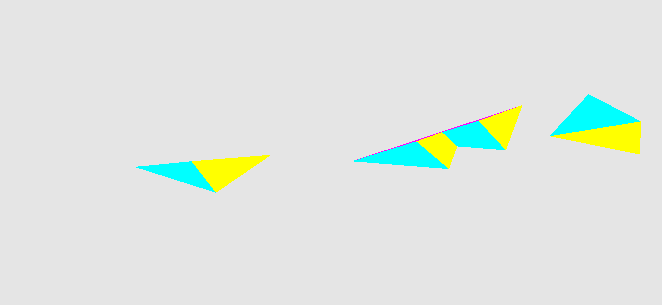

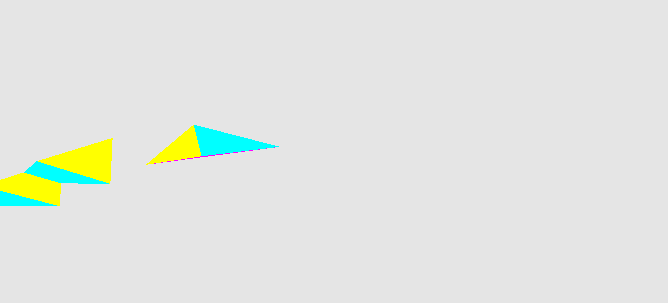

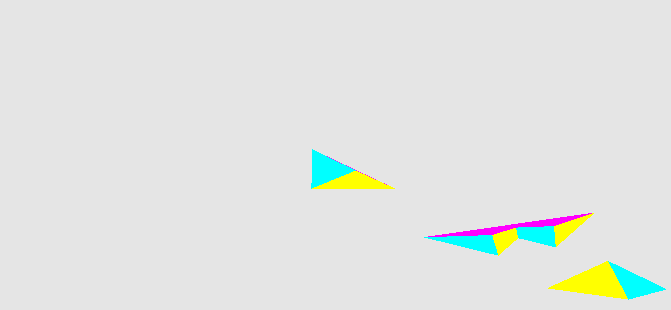

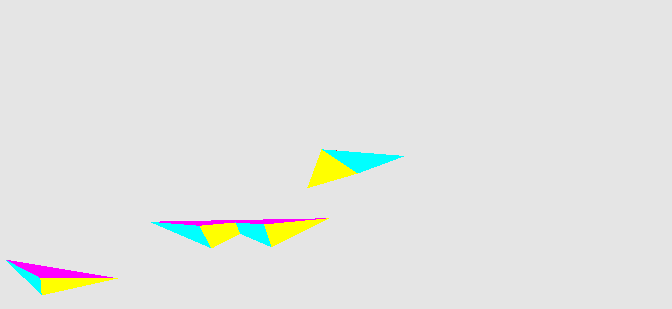